<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2025/blob/main/Module_2/7_SymbolicRegression_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Spring 2025 UTK MSE 510/494 Course on mathematic methods.
- Instructor Sergei V. Kalinin, sergei2@utk.edu

# Installing PySR

In [ ]:
'''
# Install Julia
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz
!tar -xvzf julia-1.6.1-linux-x86_64.tar.gz
!mv julia-1.6.1 /opt/
!ln -s /opt/julia-1.6.1/bin/julia /usr/local/bin/julia

# Test Julia installation
!julia -e 'using InteractiveUtils; versioninfo()'

# Install IJulia to get the Julia Kernel
!julia -e 'import Pkg; Pkg.add("IJulia")'
'''

'\n# Install Julia\n!wget https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz\n!tar -xvzf julia-1.6.1-linux-x86_64.tar.gz\n!mv julia-1.6.1 /opt/\n!ln -s /opt/julia-1.6.1/bin/julia /usr/local/bin/julia\n\n# Test Julia installation\n!julia -e \'using InteractiveUtils; versioninfo()\'\n\n# Install IJulia to get the Julia Kernel\n!julia -e \'import Pkg; Pkg.add("IJulia")\'\n'

In [ ]:
!pip install pysr #==0.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pysr
# pysr.install()

[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/pysr/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.3 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.3-linux-x86_64.tar.gz
             download complete
[juliapkg] Verifying download


# Regression-optimization

The code from: https://towardsdatascience.com/optimization-with-surrogate-models-via-symbolic-regression-38f9b7536a36

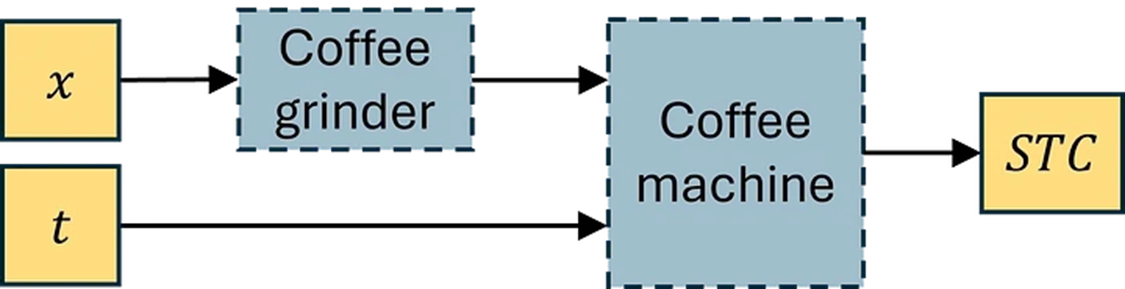

In [ ]:
# Get the bounds of the data
xbounds = [0.05, 1] # mm
tbounds = [5, 60]   # seconds

# Get some samples [x,t]=[particle size, brewing time]
samples = [[0.05, 10], [0.05, 50], [0.09, 15], [0.2, 25], [0.3, 35], [0.3, 45], [0.5, 15], [1, 55], [0.6, 55], [0.8, 15], [0.95, 10], [0.8, 30]]

In [ ]:
# Design the scaling function
def scale(x_, bounds_):
    return (x_ - bounds_[0])/(bounds_[1] - bounds_[0])

# Scale the data
samples = [[scale(samples[i][0], xbounds), scale(samples[i][1], tbounds)] for i in range(len(samples))]

# Store old bounds and scale the new bounds
xbounds_old = xbounds
tbounds_old = tbounds
xbounds = [scale(xbounds[0], xbounds), scale(xbounds[1], xbounds)]
tbounds = [scale(tbounds[0], tbounds), scale(tbounds[1], tbounds)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Some settings for the plot
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5,4]
fontsize_text = 12
fontsize_ticks = 9
DPI = 250
makevideo = True
video_angle_veocity = 4 # degrees per frame

# Define the ground truth function
def ground_truth_STC(x_,t_):
    xshift = np.mean(xbounds)
    tshift = np.mean(tbounds)
    return np.exp(-(x_ - xshift)**2 - (t_ - tshift)**2)

# Get the meshgrid for plotting
X, T = np.meshgrid(np.linspace(xbounds[0], xbounds[1], 100), np.linspace(tbounds[0], tbounds[1], 100))
STC = ground_truth_STC(X, T)

# Get a give number of samples from the ground truth function
x = [samples[i][0] for i in range(len(samples))]
t = [samples[i][1] for i in range(len(samples))]
STC_samples = ground_truth_STC(x, t)

GIF saved!


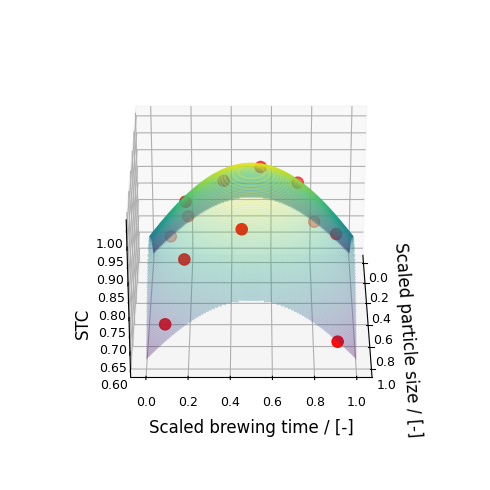

In [ ]:
# Plot the ground truth function with our sample data
figname = 'Figure_2a'
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')
ax.contour(X, T, STC, 100, alpha=0.3)
ax.scatter(x, t, STC_samples, s=65, c='r')
ax.set_xlabel('Scaled particle size / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_ylabel('Scaled brewing time / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_zlabel('STC', fontsize=fontsize_text, rotation=90, labelpad=10)
ax.xaxis.set_tick_params(labelsize=fontsize_ticks)
ax.yaxis.set_tick_params(labelsize=fontsize_ticks)
ax.zaxis.set_tick_params(labelsize=fontsize_ticks)
ax.set_box_aspect(aspect=None, zoom=0.78)
plt.tight_layout()

# Make a video
if makevideo:
    # Save figure normally
    # plt.savefig(f'./{figname}.png', dpi=DPI)
    # Rotate figure and save frames
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        ax.view_init(30, angle)
        # plt.draw() # Only needed in non-interactive mode (.py file)
        # plt.pause(.001) # Only needed in non-interactive mode (.py file)
        plt.savefig(f'./{figname}_{angle}.png', dpi=DPI)
    frames = []
    import imageio
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        image = imageio.v2.imread(f'./{figname}_{angle}.png')
        frames.append(image)
    imageio.mimsave(f'.{figname}_gif.gif', # output gif
                    frames,          # array of input frames
                    fps = 5)         # optional: frames per second
    print('GIF saved!')
else:
    plt.savefig(f'./{figname}.png', dpi=DPI)
    plt.show()

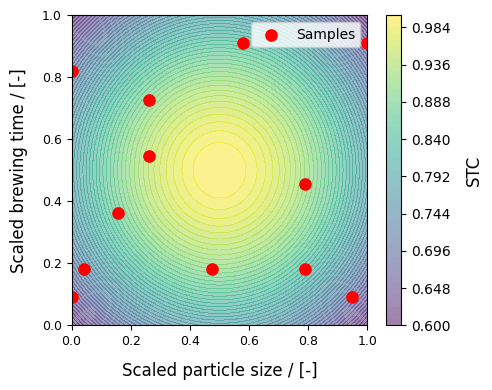

In [ ]:
figname = 'Figure_2b'
fig = plt.figure()
ax = fig.gca()
CM=ax.contourf(X, T, STC, 100, alpha=0.5, levels=50, linestyles='solid')
cbar = fig.colorbar(CM)
cbar.ax.set_ylabel('STC', fontsize=fontsize_text, rotation=90, labelpad=10)
ax.scatter(x, t, s=65, c='r', label='Samples')
ax.set_xlabel('Scaled particle size / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_ylabel('Scaled brewing time / [-]', fontsize=fontsize_text, labelpad=10)
ax.xaxis.set_tick_params(labelsize=fontsize_ticks)
ax.yaxis.set_tick_params(labelsize=fontsize_ticks)
ax.legend()
plt.tight_layout()
plt.savefig(f'./{figname}.png', dpi=DPI)

In [ ]:
inputs = np.array([x, t]).T
outputs = np.array(STC_samples)
print(f'[+] Shape of inputs: {inputs.shape}')
print(f'[+] Shape of outputs: {outputs.shape}')

[+] Shape of inputs: (12, 2)
[+] Shape of outputs: (12,)


In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-"], unary_operators=["square", "exp"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:1007: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(


In [ ]:
model.fit(inputs, outputs)

Compiling Julia backend...


/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.990e+05
Progress: 272 / 3100 total iterations (8.774%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           1.063e-02  7.971e+00  y = exp(-0.21795)
4           1.063e-02  6.271e-05  y = (x₀ * -0.0031185) - -0.80585
5           1.059e-02  3.846e-03  y = exp((x₁ * 0.025508) - 0.2292)
6           2.398e-03  1.485e+00  y = exp(-0.091304 - square(0.47707 - x₀))
10          2.043e-03  4.003e-02  y = exp((square(0.91487 - x₀) * -0.25903) - square(0.36325...
                                       - x₀))
11          1.792e-03  1.315e-01  y = (exp(x₀ - x₀) * 1.9464) - exp(square(0.48115 - x₀))
───────────────────────────────────────────────────────────────────────────────────────────────────
═════════════════════════════════════════════════════════════════════

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                    exp(-0.2179522)   
	1        0.000063                 (x0 * -0.0031185318) - -0.80585253   
	2        0.003846               exp((x1 * 0.025508314) - 0.22920226)   
	3  >>>>  1.485325         exp(-0.09130373 - square(0.47706574 - x0))   
	4        0.040027  exp((square(0.91486794 - x0) * -0.25903094) - ...   
	5        0.131492  (exp(x0 - x0) * 1.9463576) - exp(square(0.4811...   
	
	       loss  complexity  
	0  0.010633           2  
	1  0.010632           4  
	2  0.010591           5  
	3  0.002398           6  
	4  0.002043          10  
	5  0.001792          11  
]

  - outputs/20250209_225332_6NVPWT/hall_of_fame.csv


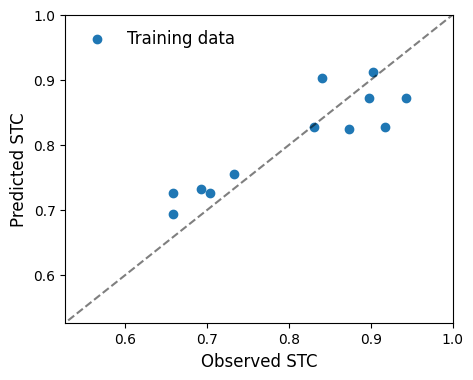

In [ ]:
figname = 'Figure_3'
plt.figure()
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.scatter(outputs, model.predict(inputs), label='Training data')
plt.xlabel('Observed STC', fontsize=fontsize_text)
plt.ylabel('Predicted STC', fontsize=fontsize_text)
plt.xlim([np.min(outputs)*0.8, 1])
plt.ylim([np.min(outputs)*0.8, 1])
plt.legend(fontsize=12, frameon=False)
plt.savefig(f'./{figname}.png', dpi=DPI)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs, model.predict(inputs))
print(f'[+] Best identified model (LaTeX): {model.latex()}')
print(f'[+] R2 score: {r2}')

[+] Best identified model (LaTeX): e^{- \left(0.477 - x_{0}\right)^{2} - 0.0913}
[+] R2 score: 0.7744667490753022


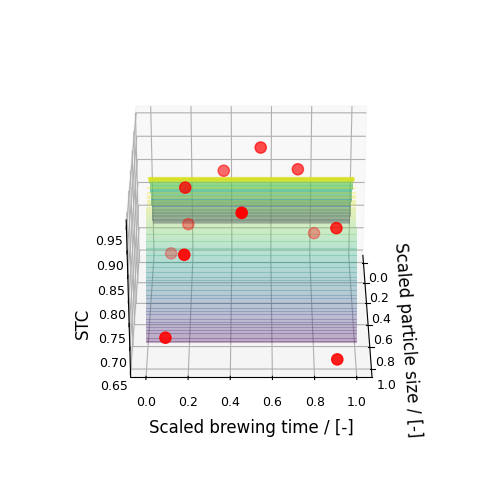

In [ ]:
# Get a meshgrid for the samples (smaller than above)
X, T = np.meshgrid(np.linspace(xbounds[0], xbounds[1], len(x)), np.linspace(tbounds[0], tbounds[1], len(t)))
STCpred = np.zeros([len(x), len(t)])

# Extract each
for i in range(len(x)):
    for j in range(len(t)):
        datapoint = np.array([X[i,j], T[i,j]]).reshape(1,-1)
        STCpred[i,j] = model.predict(X=datapoint)[0]

# Plot
figname = 'Figure_4'
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')
ax.contour(X, T, STCpred, 100, alpha=0.3)
ax.scatter(x, t, STC_samples, s=65, c='r')
ax.set_xlabel('Scaled particle size / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_ylabel('Scaled brewing time / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_zlabel('STC', fontsize=fontsize_text, rotation=90, labelpad=10)
ax.xaxis.set_tick_params(labelsize=fontsize_ticks)
ax.yaxis.set_tick_params(labelsize=fontsize_ticks)
ax.zaxis.set_tick_params(labelsize=fontsize_ticks)
ax.set_box_aspect(aspect=None, zoom=0.78)
plt.tight_layout()

# Make a video
if makevideo:
    # Save figure normally
    plt.savefig(f'./{figname}.png', dpi=DPI)
    # Rotate figure and save frames
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        ax.view_init(30, angle)
        # plt.draw() # Only needed in non-interactive mode (.py file)
        # plt.pause(.001) # Only needed in non-interactive mode (.py file)
        plt.savefig(f'./{figname}_{angle}.png', dpi=DPI)
    frames = []
    import imageio
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        image = imageio.v2.imread(f'./{figname}_{angle}.png')
        frames.append(image)
    imageio.mimsave(f'./{figname}_gif.gif', # output gif
                    frames,          # array of input frames
                    fps = 5)         # optional: frames per second
else:
    plt.savefig(f'./{figname}.png', dpi=DPI)
    plt.show()

# (Optional) Exploring square and triangle Ising models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

from tqdm import tqdm
from typing import Union, Dict, Callable

import math
import time

In [ ]:
#@title Square Ising Model

class IsingSim():

  """This class performs Ising model simulations on a 2D grid. Interaction parameters are given by a matrix at each lattice site.
  Field dependence is not supported at this time but will be in due course. The simulator outputs configurations after equlibrium
  as well as the trajectories, if specifically requested.
  Inputs:
    - N : (integer) - Size of lattice will be N^2. Only 2D square lattice is supported at this stage.
    - J_mat: (numpy matrix of shape(5,5)) - entries being floats for interaction parameters. Self-interaction (middle element of matrix)=0.
    - T: (float) - Reduced temperature for simulation
    - save_trajectories: (Boolean) - whether to save trajectories, or only final state. Default False.
    - eqSteps: (integer) number of Monte-Carlo steps for equlibration before simulation starts. Default 750. AKA 'burn-in'.
    - mcSteps: (integer) number of Monte-Carlo for simulation. Default 750.
  Outputs: Several outputs are available, including trajectories (if called), configurations (i.e., the 2D states) and configurations histograms.
  These can be obtained by calling methods self.configurations(), self.histograms() and self.trajectories()"""

  def __init__(self, N = 40, J_mat = None, T = 2.7, save_trajectories = False,
               eqSteps = 750, mcSteps = 750):
    self.N = N

    #If no J matrix is provided we default to isotropic J interaction with NN with value 0.5
    if np.array(J_mat).all() == None:
      J_mat = np.zeros((5,5))
      J_mat[1,2] = J_mat[2,1] = J_mat[2,3] = J_mat[3,2] = 0.5 #Defaulting to 0.5 for NN, all others zeroed out.

    self.J_mat = J_mat

    self.save_trajectories = save_trajectories
    self.eqSteps = eqSteps
    self.mcSteps = mcSteps
    self.config = self.initialState(random = False)
    self.T = T

  def initialState(self, random = False):
    ''' Generates a lattice with spin configurations drawn randomly [-1 or 1] if random=True
    Else, the lattice is generated with all sites = 1 '''

    if random==True: state = 2*np.random.randint(2, size=(self.N,self.N))-1
    else: state = np.ones([self.N,self.N])

    return state

  def mcmove(self, config):
    '''Monte Carlo move using Metropolis algorithm '''

    M = 5 #neighborhood size (M^2). Do not change!
    beta = 1.0/self.T

    for i in range(self.N):
      for j in range(self.N):
        J_mat = self.J_mat
        cost = 0.0
        s =  np.copy(config[i, j])

        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            cost += 2 * J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

        if cost < 0:
          s *= -1
        elif rand() < np.exp(-cost*beta):
          s *= -1
        config[i, j] = s
    return config


  def calcEnergy(self, config):
    '''Returns the energy of the current configuration'''
    M = 5
    energy = 0.0
    for i in range(len(config)):
      for j in range(len(config)):
        J_mat = self.J_mat #otherwise, no

        s = config[i,j]
        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            energy += -J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

    return energy/4.0


  def calcMag(self, config):
    '''Magnetization of a given configuration'''
    return np.sum(config)

  def calcAbsMag(self, config):
    ''' Absolute Magnetization of a given configuration'''
    return (np.abs(np.sum(config)))*1.0

  def performIsingSim(self):

    E1, M1, E2, M2 = 0.0,0.0,0.0,0.0    #These are all the average properties of all MC steps used
    E_traj, M_traj = np.zeros(self.mcSteps), np.zeros(self.mcSteps)

    config = np.copy(self.config)
    T = self.T
    if self.save_trajectories: config_mat = np.zeros([self.mcSteps,self.N,self.N])   #Saving all the configurations


    print('\n---Performing Equlibration---\n')
    for i in tqdm(range(self.eqSteps)):
        config = self.mcmove(config)

    print('\n---Finished...\n----Performing MC Moves----\n')
    for j in tqdm(range(self.mcSteps)):
        config = self.mcmove(config)
        Ene, Mag = self.calcEnergy(config), self.calcAbsMag(config)
        E_traj[j] = self.calcEnergy(config)/(self.N*self.N)
        M_traj[j] = self.calcAbsMag(config)/(self.N*self.N)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag * Mag
        E2 = E2 + Ene * Ene

        if self.save_trajectories: config_mat[j] = config

    print('Completed. Saving')
    Energy = E1 / (self.mcSteps * self.N * self.N)
    Magnetization = M1 / (self.mcSteps * self.N * self.N)
    n1, n2  = 1.0/(self.mcSteps*self.N*self.N), 1.0/(self.mcSteps*self.mcSteps*self.N*self.N)
    iT = 1.0/self.T
    iT2 = iT*iT
    SpecificHeat = (n1*E2 - n2*E1*E1)*iT2
    Susceptibility = (n1*M2 - n2*M1*M1)*iT
    # SpecificHeat = (E2 / self.mcSteps - E1 * E1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T * self.T)
    # Susceptibility = (M2 / self.mcSteps - M1 * M1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T)

    self.config = config


    if self.save_trajectories:
      results_dict = {'config': config_mat, 'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility, 'E_traj': E_traj,
      'M_traj': M_traj,
      }
    else:
      results_dict = {'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility,
      'E_traj': E_traj, 'M_traj': M_traj,}

    self.results = results_dict

    return 'Completed simulation'

In [ ]:
#@title Triangular Ising model
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


class Tri_IsingSim():

  """This class performs Ising model simulations on a 2D grid. Interaction parameters are given by a matrix at each lattice site.
  Field dependence is not supported at this time but will be in due course. The simulator outputs configurations after equlibrium
  as well as the trajectories, if specifically requested.
  Inputs:
    - N : (integer) - Size of lattice will be N^2 : 2D triangular lattice
    - J_mat: (numpy matrix of shape(3,5)) - entries being floats for interaction parameters. Self-interaction (middle element of matrix)=0.
              or: (list) of size(3,5) with each element belonging to scipy distribution from which to draw J value (for bond disorder)
    - T: (float) - Reduced temperature for simulation
    - save_trajectories: (Boolean) - whether to save trajectories, or only final state. Default False.
    - eqSteps: (integer) number of Monte-Carlo steps for equlibration before simulation starts. Default 750. AKA 'burn-in'.
    - mcSteps: (integer) number of Monte-Carlo for simulation. Default 750.
  Outputs: Several outputs are available, including trajectories (if called), configurations (i.e., the 2D states) and configurations histograms.
  These can be obtained by calling methods self.configurations(), self.histograms() and self.trajectories()"""

  def __init__(self, N = 40, J_mat = None, T = 2.7, save_trajectories = False,
               eqSteps = 750, mcSteps = 750, prop = 0.5):
    self.N = N
    self.prop = prop
    #If no J matrix is provided we default to isotropic J interaction with NN with value 0.5
    if (J_mat).all == None:
      J_mat = np.zeros((3,5))
      J_mat[0,1] = J_mat[0,3] = J_mat[1,0] = J_mat[1,4] = J_mat[2,1] = J_mat[2,3] = 0.5 #Defaulting to 0.5 for NN, all others zeroed out.

    self.J_mat = J_mat
    self.save_trajectories = save_trajectories
    self.eqSteps = eqSteps
    self.mcSteps = mcSteps
    self.config = self.initialState()
    self.T = T

  def initialState(self):
    ''' Generates a lattice with spin configurations drawn randomly [-1 or 1] if random=True
    Else, the lattice is generated with all sites = 1
    Can do better, remove probability and see how you can include numbers'''

    state = np.random.choice([1, -1], size = ([self.N,2*self.N]), p=[self.prop, 1-self.prop])

    for i in range(0,self.N,2):
      for j in range(0,2*self.N,2):
        state[i,j] = 0

    for i in range(1,self.N,2):
      for j in range(1,2*self.N,2):
        state[i,j] = 0


    return state

  def EmptySite(self, row_1, col_1, spin_1, config):
    #You can do better, this takes a lot of time because of intermittent zeros
    row_2, col_2 = row_1, col_1
    spin_2 = spin_1
    while (spin_2*spin_1 != -1.0):
        row_2, col_2     = np.random.randint(0, self.N), np.random.randint(0, 2*self.N)
        spin_2 = config[row_2, col_2]

    return row_2, col_2

  def mcmove(self):
    '''Monte Carlo move using Metropolis algorithm '''
    M = 3 #check whether you can obtain this from J_mat
    T = 5
    beta = 1.0/self.T
    config = self.config
    config_1 = np.where(config == -1, 0.0, config)

    for i in range(self.N):
      for j in range(2*self.N):
        row_1, col_1 = np.random.randint(0, self.N), np.random.randint(0, 2*self.N)
        spin_1 = config[row_1, col_1]

        if(spin_1):
          J_mat = self.J_mat
          row_2, col_2 = np.random.randint(0, self.N), np.random.randint(0, 2*self.N)
          spin_2   = config[row_2, col_2]

          if (spin_2*spin_1 != -1.0):
            (row_2, col_2) = self.EmptySite(row_1, col_1, spin_1, config)
            spin_2 = config[row_2, col_2]

          ini_ene_1, ini_ene_2, fin_ene_1, fin_ene_2 = 0.0,0.0,0.0,0.0

          if spin_1 == 1.0:
              for p in range(-int(M/2), int(M/2)+1, 1):
                for q in range(-int(T/2), int(T/2)+1, 1):
                  ini_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_1
                  ini_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_2
                  fin_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_2
                  fin_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_1

          if spin_1 == -1.0:
              for p in range(-int(M/2), int(M/2)+1, 1):
                for q in range(-int(T/2), int(T/2)+1, 1):
                  ini_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_1
                  ini_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_2
                  fin_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_2
                  fin_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_1

          cost = (fin_ene_1 + fin_ene_2) - (ini_ene_1 + ini_ene_2)
          if cost < 0 or (rand() < np.exp(-cost*beta)):
            spin_1 *= -1
            spin_2 *= -1
          config[row_1, col_1], config[row_2, col_2] = spin_1, spin_2

      self.config = config
    return None


  def calcEnergy(self):
    '''Returns the energy of the current configuration'''
    config = self.config
    config_1 = np.where(config == -1, 0.0, config)
    M = 3
    T = 5
    energy = 0.0
    for i in range(self.N):
      for j in range(2*self.N):

        J_mat = self.J_mat #otherwise, no

        s = config[i,j]
        if (s):
            if s == 1.0:
                for p in range(-int(M/2), int(M/2)+1, 1):
                    for q in range(-int(T/2), int(T/2)+1, 1):
                        energy += -J_mat[int(M/2)+p, int(T/2)+q] * config[(i+p)%self.N,(j+q)%(2*self.N)] * config[i,j]

            if s == -1.0:
                for p in range(-int(M/2), int(M/2)+1, 1):
                    for q in range(-int(T/2), int(T/2)+1, 1):
                        energy += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(i+p)%self.N,(j+q)%(2*self.N)] * config[i,j]
    return energy/4.0


  def calcMag(self):
    '''Magnetization of a given configuration'''
    return float(np.nansum(self.config))

  def calcAbsMag(self):
    ''' Absolute Magnetization of a given configuration'''
    return float(np.abs(np.nansum(self.config)))

  def performIsingSim(self):

    E1, E2 = 0.0,0.0   #These are all the average properties of all MC steps used
    E_traj = np.zeros(self.mcSteps)
    if self.save_trajectories: config_mat = np.zeros([self.mcSteps,self.N,2*self.N])   #Saving all the configurations

    print('\n---Performing Equlibration---\n')
    for i in tqdm(range(self.eqSteps)):
        self.mcmove()

    print('\n---Finished...\n----Performing MC Moves----\n')
    for j in tqdm(range(self.mcSteps)):
        self.mcmove()
        Ene = self.calcEnergy()
        E_traj[j] = Ene/(self.N*self.N)


        E1 = E1 + Ene
        E2 = E2 + Ene * Ene

        if self.save_trajectories: config_mat[j] = self.config

    print('Completed. Saving')
    Energy = E1 / (self.mcSteps * self.N * self.N)
    n1, n2  = 1.0/(self.mcSteps*self.N*self.N), 1.0/(self.mcSteps*self.mcSteps*self.N*self.N)
    iT = 1.0/self.T
    iT2 = iT*iT
    SpecificHeat = (n1*E2 - n2*E1*E1)*iT2
    # SpecificHeat = (E2 / self.mcSteps - E1 * E1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T * self.T)
    # Susceptibility = (M2 / self.mcSteps - M1 * M1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T)




    if self.save_trajectories:
      results_dict = {'config': config_mat, 'Energy': Energy,
      'SpecificHeat': SpecificHeat,
      'E_traj': E_traj}
    else:
      results_dict = {'Energy': Energy, 'E_traj': E_traj,
      'SpecificHeat': SpecificHeat,
    }

    self.results = results_dict

  def plot_config(self, config, figsize=(7, 7)):
    """
    Plots the spin configuration on a hexagonal lattice.

    Parameters:
        self: Object containing lattice size (self.N)
        config: 2D numpy array representing the spin configuration
        figsize: Tuple, figure size
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Hexagonal grid parameters
    dx = 1.0  # Spacing in x-direction
    dy = np.sqrt(3) / 2  # Spacing in y-direction (height of hexagon)
    radius = dx / 2.2  # Size of the hexagons

    # Define colormap
    cmap = colors.ListedColormap(['blue', 'red'])  # Blue = -1, Red = +1
    norm = colors.BoundaryNorm([-1, 0, 1], cmap.N)

    patches = []
    values = []

    for i in range(self.N):
        for j in range(self.N):
            x_pos = j * dx  # Horizontal position
            y_pos = i * dy  # Vertical position

            # Offset every other row (hexagonal staggering)
            if j % 2 == 1:
                y_pos += dy / 2

            polygon = mpatches.RegularPolygon((x_pos, y_pos), numVertices=6, radius=radius, orientation=np.radians(0))
            patches.append(polygon)
            values.append(config[i, j])  # Assign spin values

    # Create patch collection
    collection = PatchCollection(patches, cmap=cmap, norm=norm, alpha=1.0)
    collection.set_array(np.array(values))

    ax.add_collection(collection)

    # Adjust plot limits to fit hexagonal tiling
    ax.set_xlim(-dx, self.N * dx)
    ax.set_ylim(-dy, self.N * dy)
    ax.set_aspect('equal')  # Ensure correct aspect ratio
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

Full grid evaluation for 20x20 1D Ising model - Square Model

Recommended parameters:
- 20x20 field
- 500 steps for equilibration
- 500 steps for computation


---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 60.85it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:01<00:00, 25.08it/s]


Completed. Saving


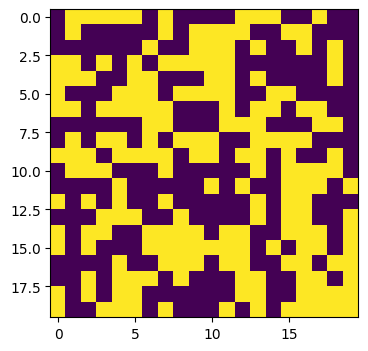

In [ ]:
results_dict = {}
approx_ys = np.zeros(1)
time_eval = np.zeros(1)

J_mat = np.array([[0,0,0,0,0],
                  [0,0,1,0,0],
                  [0,1,0,1,0],
                  [0,0,1,0,0],
                  [0,0,0,0,0]])

start_time = time.time()

np.random.seed(0)
sq_sim = IsingSim(N = 20, J_mat = J_mat, T = 12.7, save_trajectories=True, eqSteps = 50, mcSteps = 50)  # Intializing the object
sq_sim.performIsingSim()   # Running the sim
end_time = time.time()
time_eval = end_time-start_time

results_dict[0] = {'sim': sq_sim.results,}
approx_ys[0] = results_dict[0]['sim']['SpecificHeat']
plt.imshow(results_dict[0]['sim']['config'][-1])
plt.show()

Full grid evaluation for 20x20 1D Ising model - Triangular Model

Recommended parameters:
- 20x20 field
- 500 steps for equilibration
- 500 steps for computation


---Performing Equlibration---



100%|██████████| 150/150 [00:09<00:00, 15.83it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 150/150 [00:10<00:00, 14.61it/s]


Completed. Saving


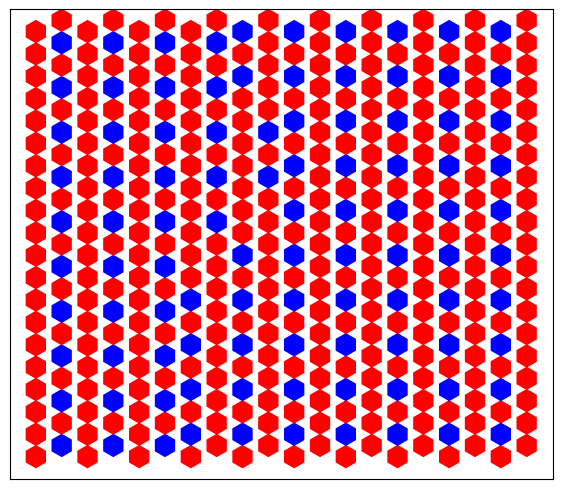

In [ ]:
results_dict_tri = {}
approx_ys_tri = np.zeros(1)
time_eval = np.zeros(1)

J_mat = np.array([[0,-1,0,-1,0],
                  [1,0,0,0,1],
                  [0,-1,0,-1,0]])

np.random.seed(0)
tri_sim = Tri_IsingSim(N = 20, J_mat = J_mat, T = 0.2, save_trajectories=True, # Intializing the object
                       eqSteps = 150, mcSteps = 150,
                       prop = 0.5)  # Proportion of the sites occupied

tri_sim.performIsingSim()   # Running the sim

results_dict_tri[0] = {'sim': tri_sim.results,}
approx_ys_tri[0] = results_dict_tri[0]['sim']['SpecificHeat']
tri_sim.plot_config(results_dict_tri[0]['sim']['config'][-1])
plt.show()

# PySr on Square Ising Model

Using Symbolic Regression in PySR package by Miles Cranmer to explore Ising model.

- The original PySR paper is: https://arxiv.org/pdf/2305.01582.pdf
- The PySR GitHub repository is: https://github.com/MilesCranmer/PySR
- The excellent docs for PySR are: https://astroautomata.com/PySR/

- The Ising model is by Rama Vasudevan, vasudevanrk@ornl.gov
- This model has been used in several of our publications, including https://pubs.aip.org/aip/jap/article/128/16/164304/568362/Exploration-of-lattice-Hamiltonians-for-functional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

from tqdm import tqdm
from typing import Union, Dict, Callable

import math
import time

In [ ]:
# @title Ising model code
class IsingSim():

  """This class performs Ising model simulations on a 2D grid. Interaction parameters are given by a matrix at each lattice site.
  Field dependence is not supported at this time but will be in due course. The simulator outputs configurations after equlibrium
  as well as the trajectories, if specifically requested.
  Inputs:
    - N : (integer) - Size of lattice will be N^2. Only 2D square lattice is supported at this stage.
    - J_mat: (numpy matrix of shape(5,5)) - entries being floats for interaction parameters. Self-interaction (middle element of matrix)=0.
    - T: (float) - Reduced temperature for simulation
    - save_trajectories: (Boolean) - whether to save trajectories, or only final state. Default False.
    - eqSteps: (integer) number of Monte-Carlo steps for equlibration before simulation starts. Default 750. AKA 'burn-in'.
    - mcSteps: (integer) number of Monte-Carlo for simulation. Default 750.
  Outputs: Several outputs are available, including trajectories (if called), configurations (i.e., the 2D states) and configurations histograms.
  These can be obtained by calling methods self.configurations(), self.histograms() and self.trajectories()"""

  def __init__(self, N = 40, J_mat = None, T = 2.7, save_trajectories = False,
               eqSteps = 750, mcSteps = 750):
    self.N = N

    #If no J matrix is provided we default to isotropic J interaction with NN with value 0.5
    if np.array(J_mat).all() == None:
      J_mat = np.zeros((5,5))
      J_mat[1,2] = J_mat[2,1] = J_mat[2,3] = J_mat[3,2] = 0.5 #Defaulting to 0.5 for NN, all others zeroed out.

    self.J_mat = J_mat

    self.save_trajectories = save_trajectories
    self.eqSteps = eqSteps
    self.mcSteps = mcSteps
    self.config = self.initialState(random = False)
    self.T = T

  def initialState(self, random = False):
    ''' Generates a lattice with spin configurations drawn randomly [-1 or 1] if random=True
    Else, the lattice is generated with all sites = 1 '''

    if random==True: state = 2*np.random.randint(2, size=(self.N,self.N))-1
    else: state = np.ones([self.N,self.N])

    return state

  def mcmove(self, config):
    '''Monte Carlo move using Metropolis algorithm '''

    M = 5 #neighborhood size (M^2). Do not change!
    beta = 1.0/self.T

    for i in range(self.N):
      for j in range(self.N):
        J_mat = self.J_mat
        cost = 0.0
        s =  np.copy(config[i, j])

        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            cost += 2 * J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

        if cost < 0:
          s *= -1
        elif rand() < np.exp(-cost*beta):
          s *= -1
        config[i, j] = s
    return config


  def calcEnergy(self, config):
    '''Returns the energy of the current configuration'''
    M = 5
    energy = 0.0
    for i in range(len(config)):
      for j in range(len(config)):
        J_mat = self.J_mat #otherwise, no

        s = config[i,j]
        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            energy += -J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

    return energy/4.0


  def calcMag(self, config):
    '''Magnetization of a given configuration'''
    return np.sum(config)

  def calcAbsMag(self, config):
    ''' Absolute Magnetization of a given configuration'''
    return (np.abs(np.sum(config)))*1.0

  def performIsingSim(self):

    E1, M1, E2, M2 = 0.0,0.0,0.0,0.0    #These are all the average properties of all MC steps used
    E_traj, M_traj = np.zeros(self.mcSteps), np.zeros(self.mcSteps)

    config = np.copy(self.config)
    T = self.T
    if self.save_trajectories: config_mat = np.zeros([self.mcSteps,self.N,self.N])   #Saving all the configurations


    print('\n---Performing Equlibration---\n')
    for i in tqdm(range(self.eqSteps)):
        config = self.mcmove(config)

    print('\n---Finished...\n----Performing MC Moves----\n')
    for j in tqdm(range(self.mcSteps)):
        config = self.mcmove(config)
        Ene, Mag = self.calcEnergy(config), self.calcAbsMag(config)
        E_traj[j] = self.calcEnergy(config)/(self.N*self.N)
        M_traj[j] = self.calcAbsMag(config)/(self.N*self.N)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag * Mag
        E2 = E2 + Ene * Ene

        if self.save_trajectories: config_mat[j] = config

    print('Completed. Saving')
    Energy = E1 / (self.mcSteps * self.N * self.N)
    Magnetization = M1 / (self.mcSteps * self.N * self.N)
    n1, n2  = 1.0/(self.mcSteps*self.N*self.N), 1.0/(self.mcSteps*self.mcSteps*self.N*self.N)
    iT = 1.0/self.T
    iT2 = iT*iT
    SpecificHeat = (n1*E2 - n2*E1*E1)*iT2
    Susceptibility = (n1*M2 - n2*M1*M1)*iT
    # SpecificHeat = (E2 / self.mcSteps - E1 * E1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T * self.T)
    # Susceptibility = (M2 / self.mcSteps - M1 * M1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T)

    self.config = config


    if self.save_trajectories:
      results_dict = {'config': config_mat, 'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility, 'E_traj': E_traj,
      'M_traj': M_traj,
      }
    else:
      results_dict = {'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility,
      'E_traj': E_traj, 'M_traj': M_traj,}

    self.results = results_dict

    return 'Completed simulation'

## Evaluation

In [ ]:
lb = 0
ub = 3
N_total = 201

#bounds = np.array((lb, ub), dtype=float)
xs = np.linspace(lb, ub, N_total)

Full grid evaluation for 20x20 1D Ising model - Square Model

Recommended parameters:
- 20x20 field
- 500 steps for equilibration
- 500 steps for computation

However, if you are impatient, run (10x10, 50, 50)

Evaluation 1 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 257.46it/s]


---Finished...
----Performing MC Moves----


100%|██████████| 50/50 [00:00<00:00, 100.03it/s]


Completed. Saving
Time (s) to complete simulation 1: 0.710892915725708


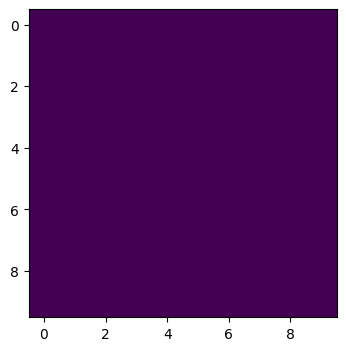

Evaluation 2 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 273.77it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 105.33it/s]


Completed. Saving
Time (s) to complete simulation 2: 0.6706175804138184


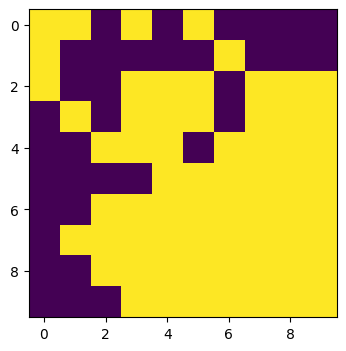

Evaluation 3 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 275.96it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 104.57it/s]


Completed. Saving
Time (s) to complete simulation 3: 0.6761608123779297


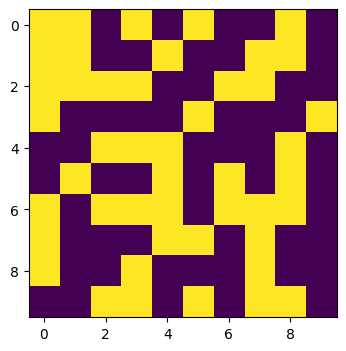

Evaluation 4 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 260.72it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 106.51it/s]


Completed. Saving
Time (s) to complete simulation 4: 0.677832841873169


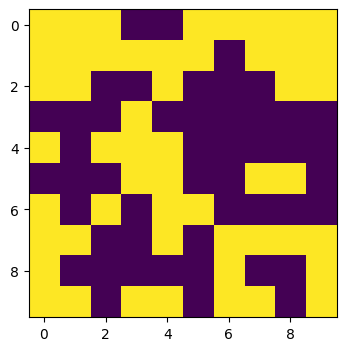

Evaluation 5 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 278.40it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 102.77it/s]


Completed. Saving
Time (s) to complete simulation 5: 0.6850018501281738


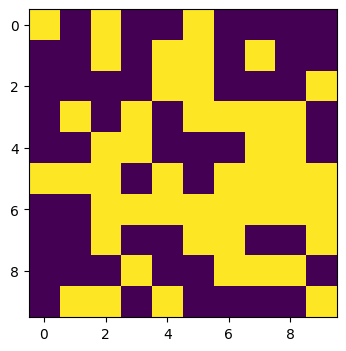

Evaluation 6 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 261.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 104.59it/s]


Completed. Saving
Time (s) to complete simulation 6: 0.692533016204834


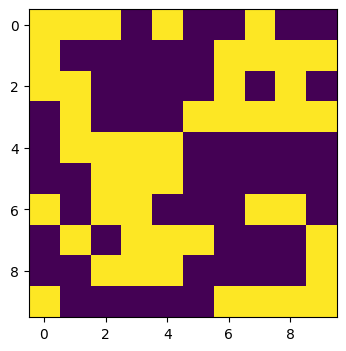

Evaluation 7 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 267.30it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 102.79it/s]


Completed. Saving
Time (s) to complete simulation 7: 0.6975526809692383


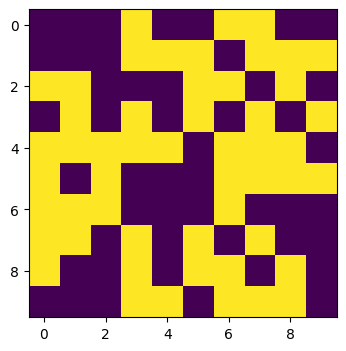

Evaluation 8 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 278.90it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 104.84it/s]


Completed. Saving
Time (s) to complete simulation 8: 0.6780915260314941


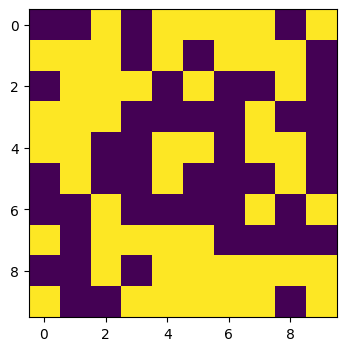

Evaluation 9 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 279.74it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 107.66it/s]


Completed. Saving
Time (s) to complete simulation 9: 0.6631159782409668


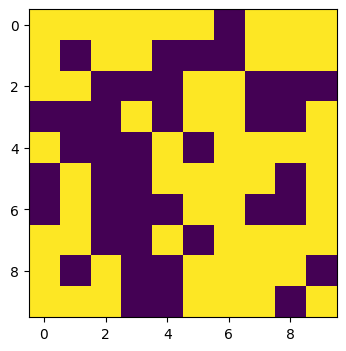

Evaluation 10 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 258.42it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 62.72it/s]


Completed. Saving
Time (s) to complete simulation 10: 1.0131630897521973


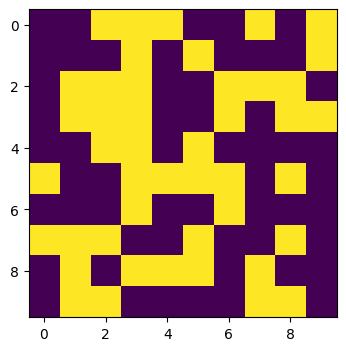

Evaluation 11 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 147.53it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 59.85it/s]


Completed. Saving
Time (s) to complete simulation 11: 1.1936566829681396


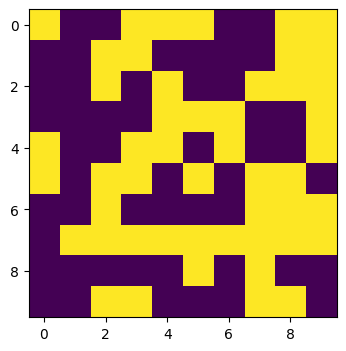

Evaluation 12 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 145.07it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 63.50it/s]


Completed. Saving
Time (s) to complete simulation 12: 1.1518912315368652


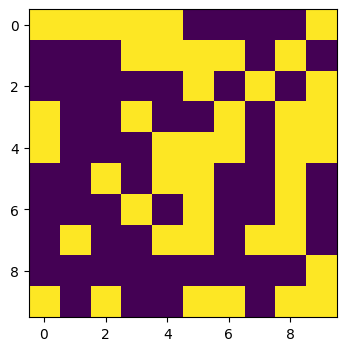

Evaluation 13 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 279.37it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.51it/s]


Completed. Saving
Time (s) to complete simulation 13: 0.6898024082183838


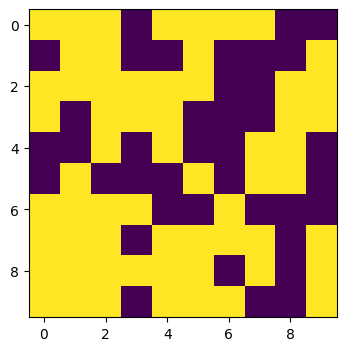

Evaluation 14 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 284.09it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.99it/s]


Completed. Saving
Time (s) to complete simulation 14: 0.6839759349822998


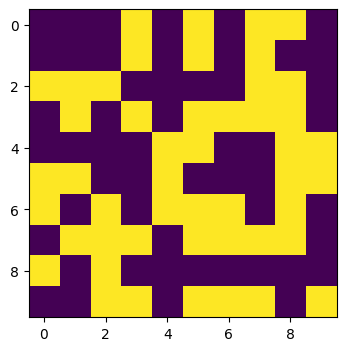

Evaluation 15 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 276.63it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.46it/s]


Completed. Saving
Time (s) to complete simulation 15: 0.6938722133636475


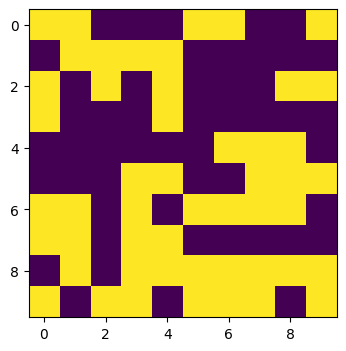

Evaluation 16 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 283.48it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.45it/s]


Completed. Saving
Time (s) to complete simulation 16: 0.6776821613311768


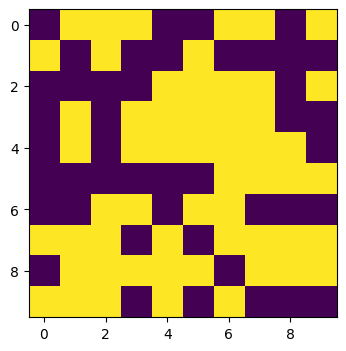

Evaluation 17 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 251.83it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 105.58it/s]


Completed. Saving
Time (s) to complete simulation 17: 0.6870577335357666


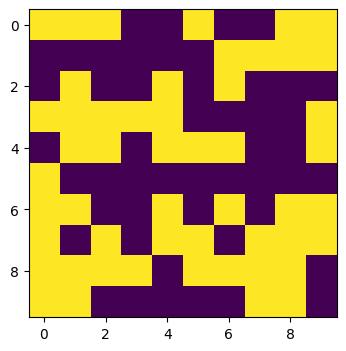

Evaluation 18 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 254.42it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.65it/s]


Completed. Saving
Time (s) to complete simulation 18: 0.7122867107391357


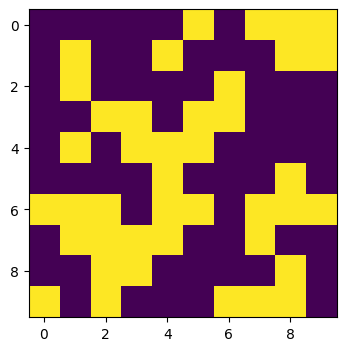

Evaluation 19 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 280.44it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.27it/s]


Completed. Saving
Time (s) to complete simulation 19: 0.6991446018218994


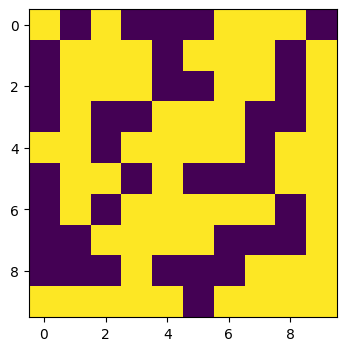

Evaluation 20 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 274.77it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.37it/s]


Completed. Saving
Time (s) to complete simulation 20: 0.6936600208282471


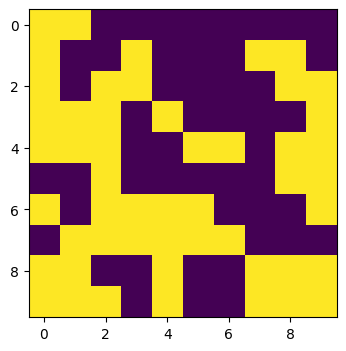

Evaluation 21 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 267.56it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 104.32it/s]


Completed. Saving
Time (s) to complete simulation 21: 0.6830935478210449


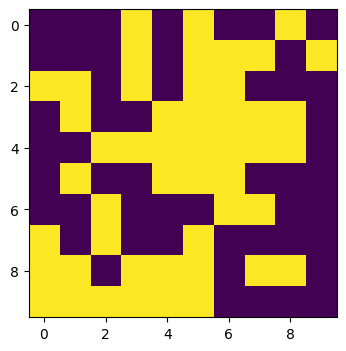

Evaluation 22 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 253.92it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 104.32it/s]


Completed. Saving
Time (s) to complete simulation 22: 0.6939144134521484


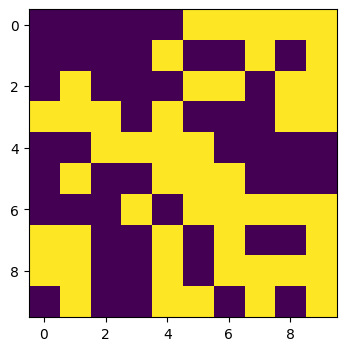

Evaluation 23 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 244.73it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.01it/s]


Completed. Saving
Time (s) to complete simulation 23: 0.7053265571594238


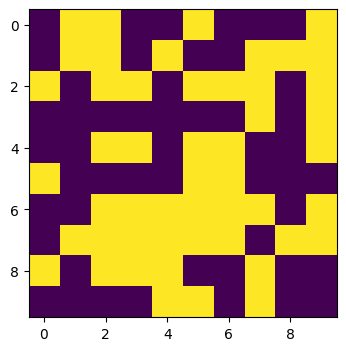

Evaluation 24 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 232.16it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 93.02it/s] 


Completed. Saving
Time (s) to complete simulation 24: 0.7794480323791504


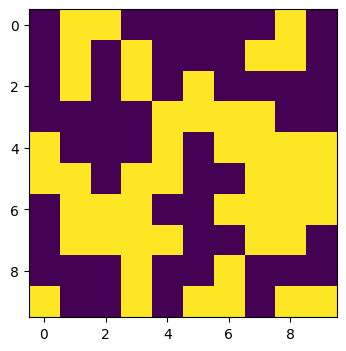

Evaluation 25 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 145.19it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.95it/s]


Completed. Saving
Time (s) to complete simulation 25: 1.2232720851898193


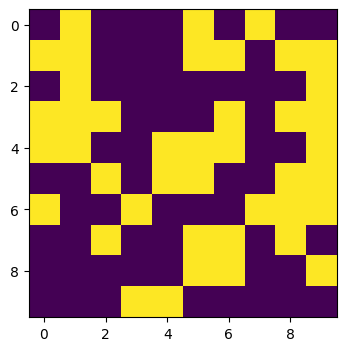

Evaluation 26 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 148.52it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.90it/s]


Completed. Saving
Time (s) to complete simulation 26: 1.207282543182373


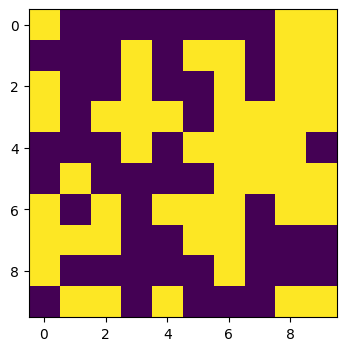

Evaluation 27 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 143.75it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 81.31it/s]


Completed. Saving
Time (s) to complete simulation 27: 0.981330156326294


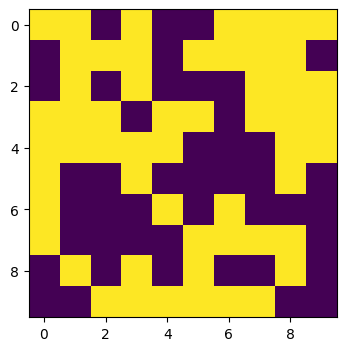

Evaluation 28 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 266.82it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.81it/s]


Completed. Saving
Time (s) to complete simulation 28: 0.7030229568481445


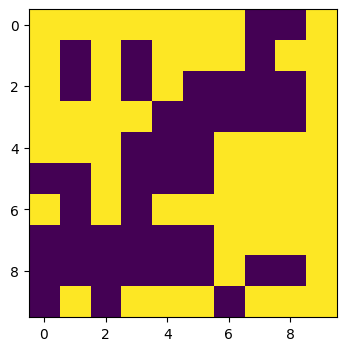

Evaluation 29 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 257.26it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.84it/s]


Completed. Saving
Time (s) to complete simulation 29: 0.6929450035095215


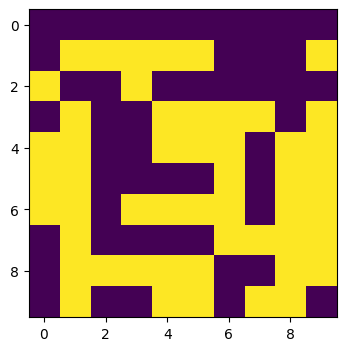

Evaluation 30 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 274.30it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.70it/s]


Completed. Saving
Time (s) to complete simulation 30: 0.7034385204315186


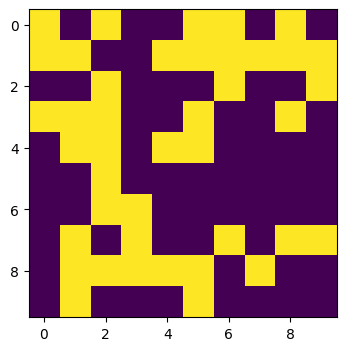

Evaluation 31 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 267.60it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.62it/s]


Completed. Saving
Time (s) to complete simulation 31: 0.7112793922424316


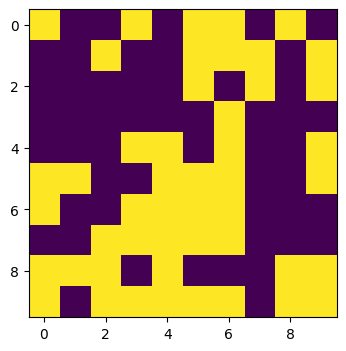

Evaluation 32 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 155.60it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.92it/s]


Completed. Saving
Time (s) to complete simulation 32: 1.2052130699157715


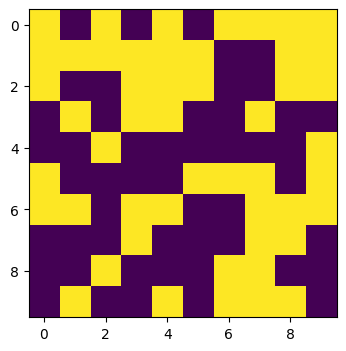

Evaluation 33 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 146.67it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.02it/s]


Completed. Saving
Time (s) to complete simulation 33: 1.2173645496368408


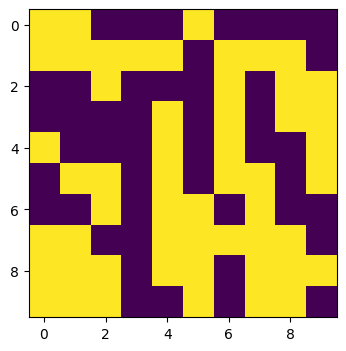

Evaluation 34 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 142.78it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 55.84it/s]


Completed. Saving
Time (s) to complete simulation 34: 1.2726984024047852


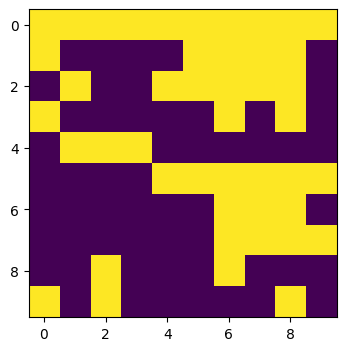

Evaluation 35 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 211.09it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.70it/s]


Completed. Saving
Time (s) to complete simulation 35: 0.7529449462890625


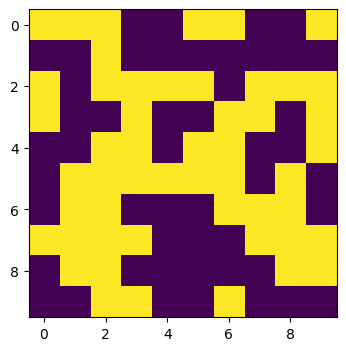

Evaluation 36 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 271.07it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 102.40it/s]


Completed. Saving
Time (s) to complete simulation 36: 0.6937427520751953


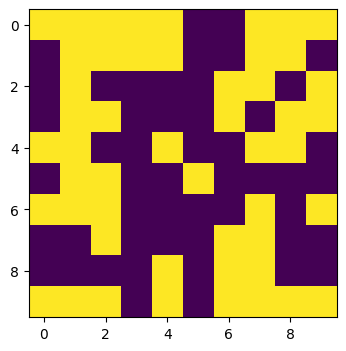

Evaluation 37 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 255.68it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 59.02it/s]


Completed. Saving
Time (s) to complete simulation 37: 1.0600745677947998


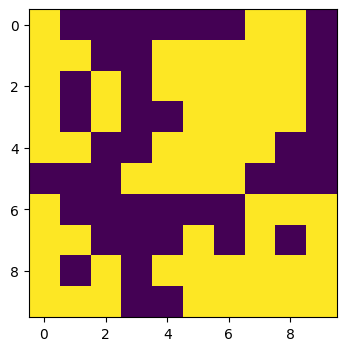

Evaluation 38 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 152.91it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.58it/s]


Completed. Saving
Time (s) to complete simulation 38: 1.2362134456634521


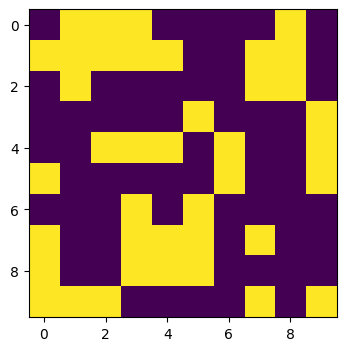

Evaluation 39 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 154.57it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.80it/s]


Completed. Saving
Time (s) to complete simulation 39: 1.2208220958709717


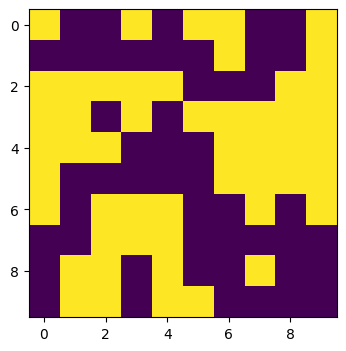

Evaluation 40 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 252.62it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.23it/s]


Completed. Saving
Time (s) to complete simulation 40: 0.6972794532775879


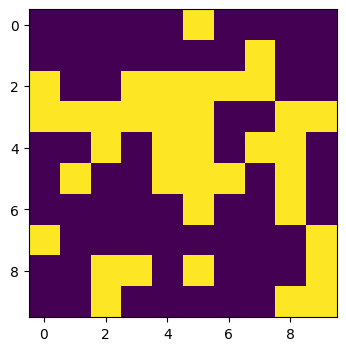

Evaluation 41 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 260.80it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.96it/s]


Completed. Saving
Time (s) to complete simulation 41: 0.698662519454956


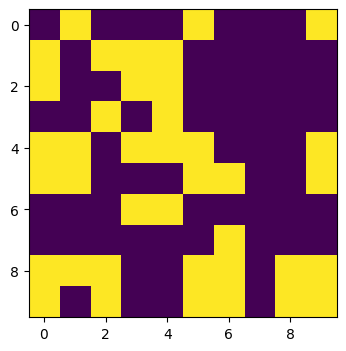

Evaluation 42 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 260.53it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.10it/s]


Completed. Saving
Time (s) to complete simulation 42: 0.717231273651123


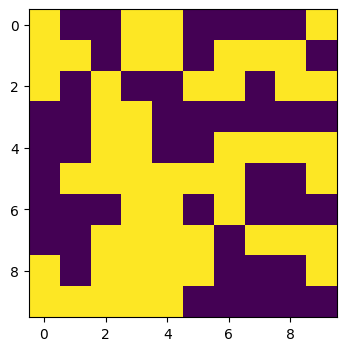

Evaluation 43 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 269.26it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.72it/s] 


Completed. Saving
Time (s) to complete simulation 43: 0.7090237140655518


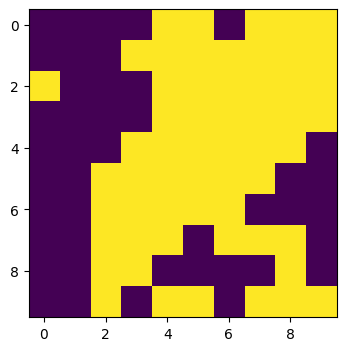

Evaluation 44 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 269.44it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.06it/s]


Completed. Saving
Time (s) to complete simulation 44: 0.6974003314971924


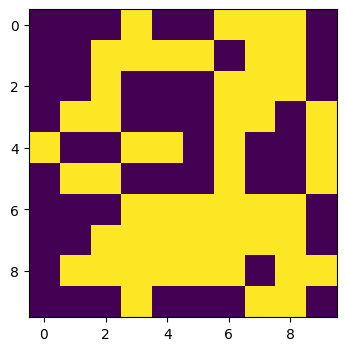

Evaluation 45 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 235.50it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 103.20it/s]


Completed. Saving
Time (s) to complete simulation 45: 0.7287092208862305


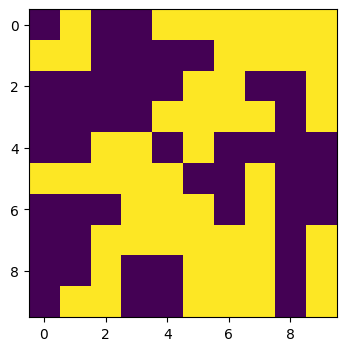

Evaluation 46 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 269.42it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.31it/s] 


Completed. Saving
Time (s) to complete simulation 46: 0.7062108516693115


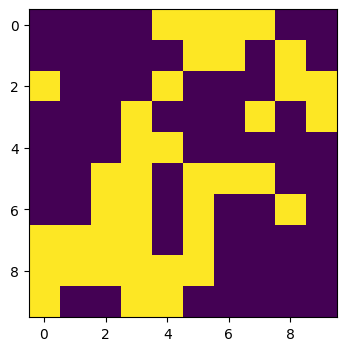

Evaluation 47 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 256.29it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.85it/s]


Completed. Saving
Time (s) to complete simulation 47: 0.7094619274139404


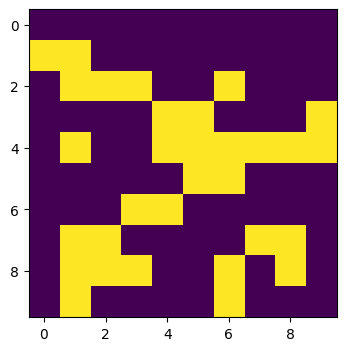

Evaluation 48 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 267.25it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.77it/s]


Completed. Saving
Time (s) to complete simulation 48: 0.7129771709442139


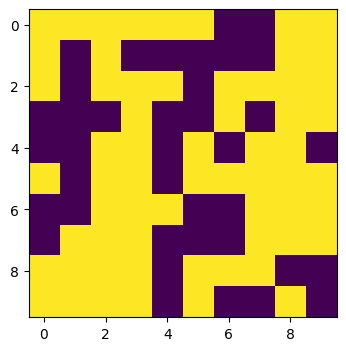

Evaluation 49 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 261.42it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.98it/s]


Completed. Saving
Time (s) to complete simulation 49: 0.7153265476226807


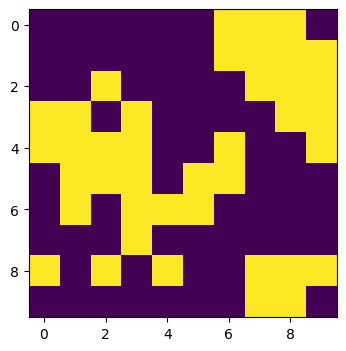

Evaluation 50 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 270.41it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.61it/s]


Completed. Saving
Time (s) to complete simulation 50: 0.6946215629577637


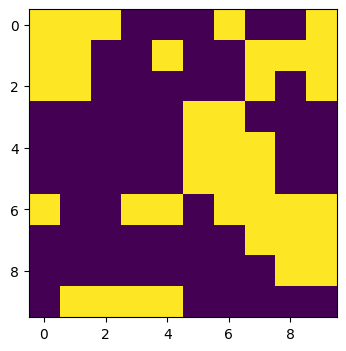

Evaluation 51 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 256.91it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.04it/s] 


Completed. Saving
Time (s) to complete simulation 51: 0.740114688873291


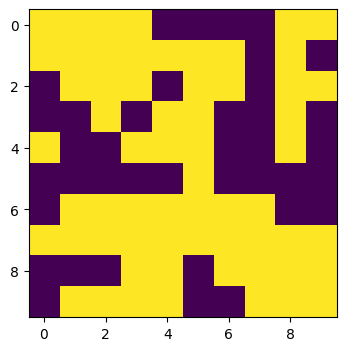

Evaluation 52 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 151.36it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.20it/s]


Completed. Saving
Time (s) to complete simulation 52: 1.2247743606567383


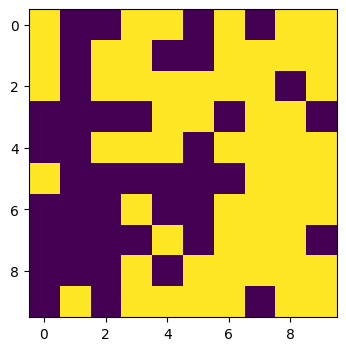

Evaluation 53 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 146.33it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.78it/s]


Completed. Saving
Time (s) to complete simulation 53: 1.2284340858459473


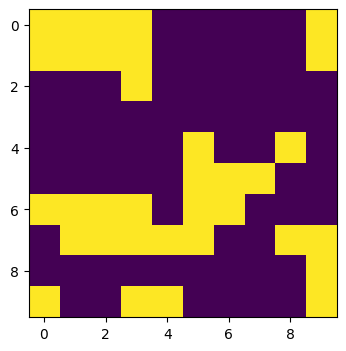

Evaluation 54 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 143.51it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 65.73it/s]


Completed. Saving
Time (s) to complete simulation 54: 1.1274380683898926


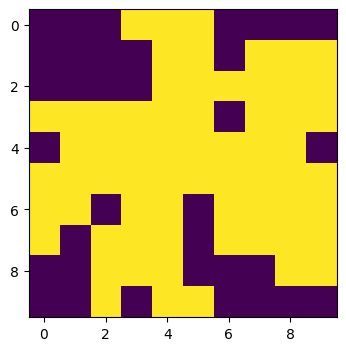

Evaluation 55 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 259.12it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.59it/s] 


Completed. Saving
Time (s) to complete simulation 55: 0.7188022136688232


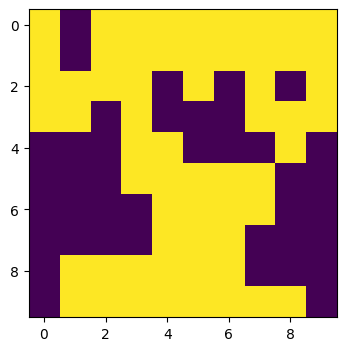

Evaluation 56 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 259.67it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.77it/s] 


Completed. Saving
Time (s) to complete simulation 56: 0.7135622501373291


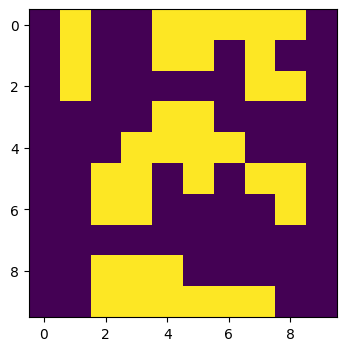

Evaluation 57 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 252.55it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.21it/s]


Completed. Saving
Time (s) to complete simulation 57: 0.7251605987548828


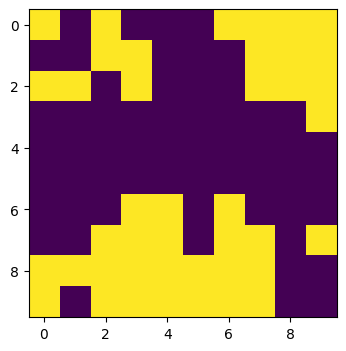

Evaluation 58 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 271.33it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.93it/s] 


Completed. Saving
Time (s) to complete simulation 58: 0.727388858795166


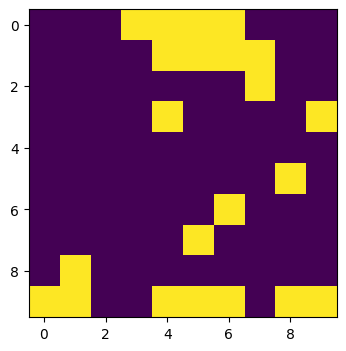

Evaluation 59 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 245.32it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 102.30it/s]


Completed. Saving
Time (s) to complete simulation 59: 0.7278423309326172


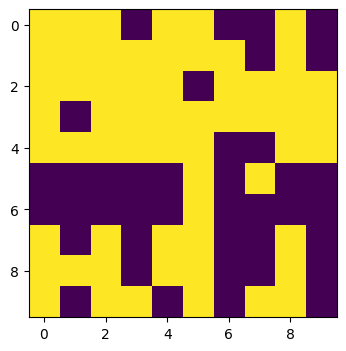

Evaluation 60 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 253.58it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.60it/s]


Completed. Saving
Time (s) to complete simulation 60: 0.7062723636627197


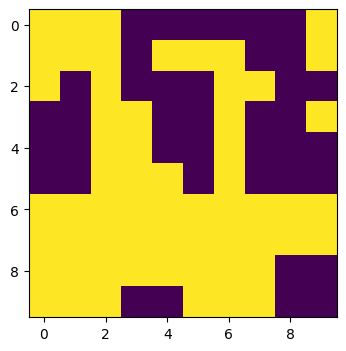

Evaluation 61 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 252.28it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.83it/s]


Completed. Saving
Time (s) to complete simulation 61: 0.7128732204437256


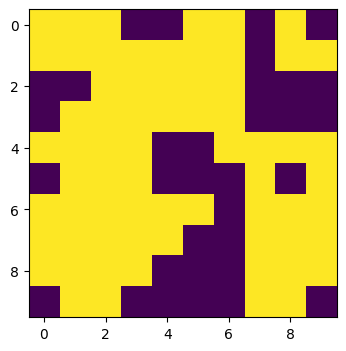

Evaluation 62 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 268.01it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.33it/s]


Completed. Saving
Time (s) to complete simulation 62: 0.7183749675750732


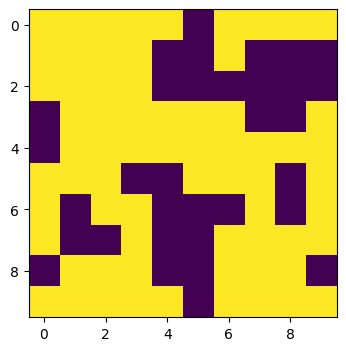

Evaluation 63 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 254.48it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.21it/s]


Completed. Saving
Time (s) to complete simulation 63: 0.7201111316680908


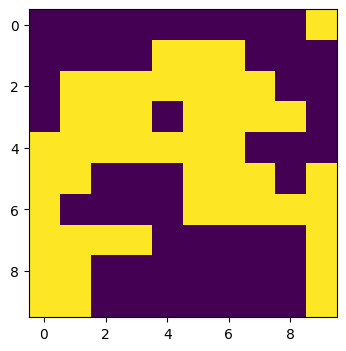

Evaluation 64 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 261.89it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.33it/s] 


Completed. Saving
Time (s) to complete simulation 64: 0.7165608406066895


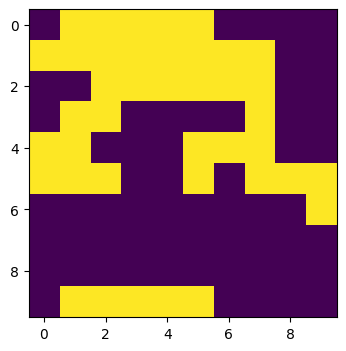

Evaluation 65 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 244.80it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.56it/s] 


Completed. Saving
Time (s) to complete simulation 65: 0.7266788482666016


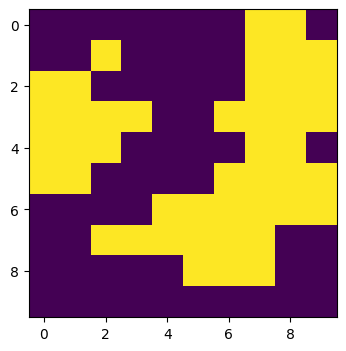

Evaluation 66 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 155.02it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.61it/s]


Completed. Saving
Time (s) to complete simulation 66: 1.2239749431610107


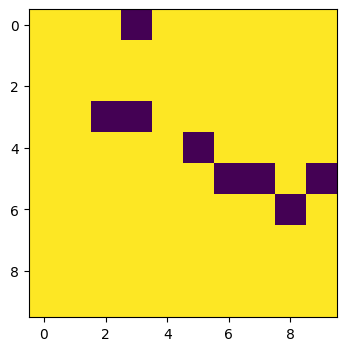

Evaluation 67 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 148.70it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.90it/s]


Completed. Saving
Time (s) to complete simulation 67: 1.2050554752349854


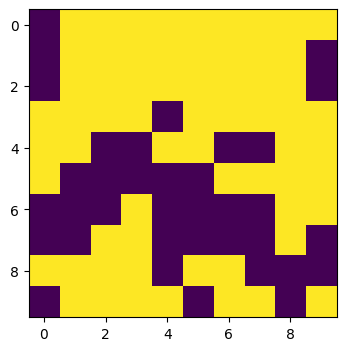

Evaluation 68 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 134.43it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 71.30it/s]


Completed. Saving
Time (s) to complete simulation 68: 1.092651128768921


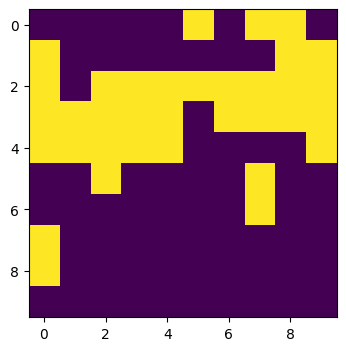

Evaluation 69 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 229.21it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.61it/s]


Completed. Saving
Time (s) to complete simulation 69: 0.72564697265625


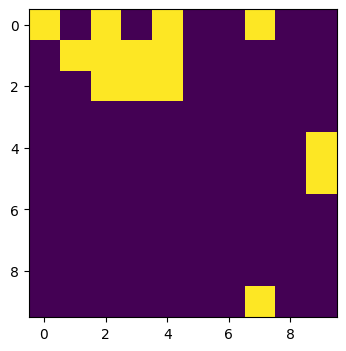

Evaluation 70 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 241.96it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.10it/s] 


Completed. Saving
Time (s) to complete simulation 70: 0.7396950721740723


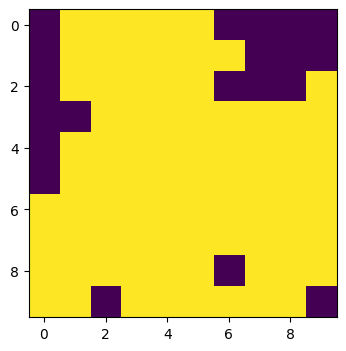

Evaluation 71 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 269.16it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.82it/s]


Completed. Saving
Time (s) to complete simulation 71: 0.7237722873687744


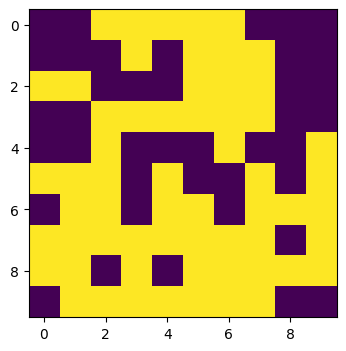

Evaluation 72 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 273.44it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.57it/s]


Completed. Saving
Time (s) to complete simulation 72: 0.72344970703125


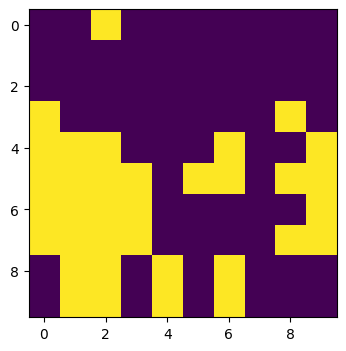

Evaluation 73 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 256.56it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.25it/s]


Completed. Saving
Time (s) to complete simulation 73: 0.718895673751831


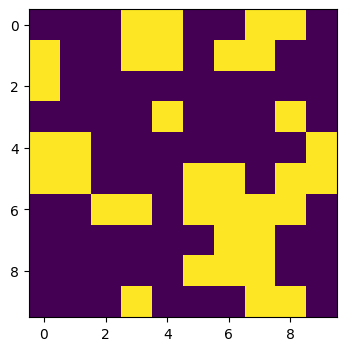

Evaluation 74 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 226.74it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 101.12it/s]


Completed. Saving
Time (s) to complete simulation 74: 0.7364232540130615


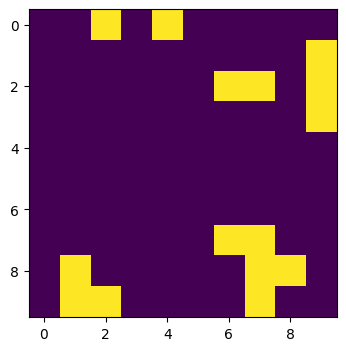

Evaluation 75 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 238.91it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.78it/s] 


Completed. Saving
Time (s) to complete simulation 75: 0.7254245281219482


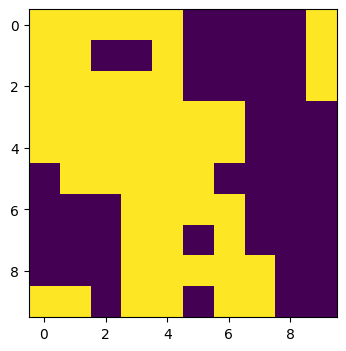

Evaluation 76 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 255.62it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.15it/s]


Completed. Saving
Time (s) to complete simulation 76: 0.7195885181427002


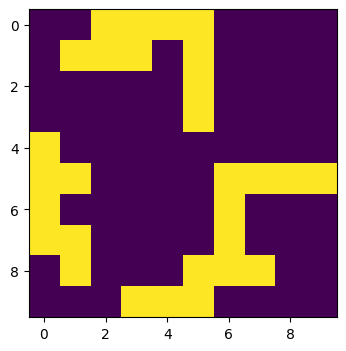

Evaluation 77 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 236.13it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.10it/s]


Completed. Saving
Time (s) to complete simulation 77: 0.7384383678436279


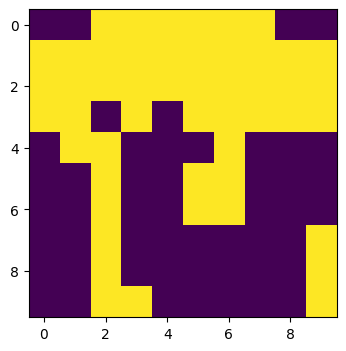

Evaluation 78 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 268.17it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 96.77it/s] 


Completed. Saving
Time (s) to complete simulation 78: 0.7355067729949951


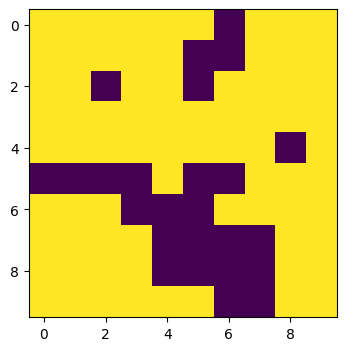

Evaluation 79 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 258.10it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.92it/s] 


Completed. Saving
Time (s) to complete simulation 79: 0.7142500877380371


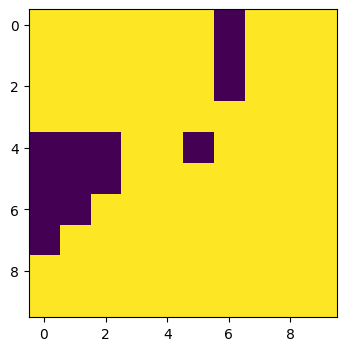

Evaluation 80 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 194.45it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 59.36it/s]


Completed. Saving
Time (s) to complete simulation 80: 1.124030590057373


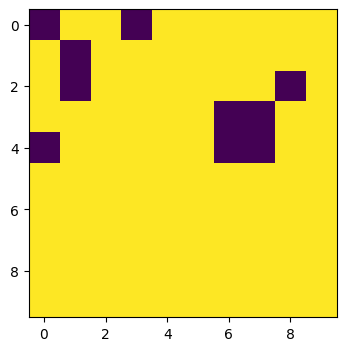

Evaluation 81 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 156.77it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.21it/s]


Completed. Saving
Time (s) to complete simulation 81: 1.1977968215942383


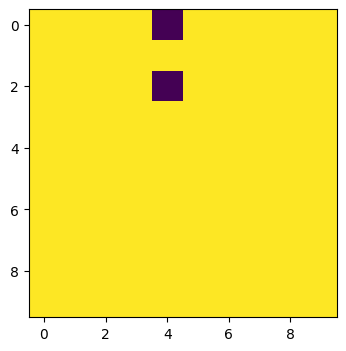

Evaluation 82 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 152.35it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 54.82it/s]


Completed. Saving
Time (s) to complete simulation 82: 1.2610125541687012


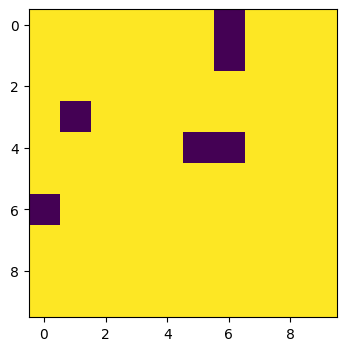

Evaluation 83 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 180.72it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 92.98it/s]


Completed. Saving
Time (s) to complete simulation 83: 0.832186222076416


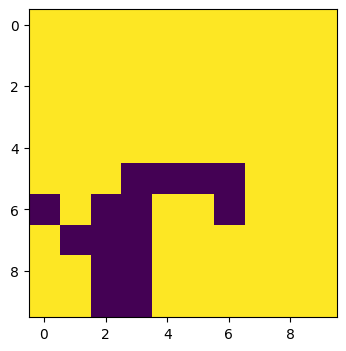

Evaluation 84 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 236.23it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.78it/s]


Completed. Saving
Time (s) to complete simulation 84: 0.7406256198883057


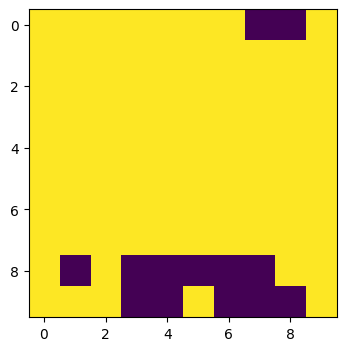

Evaluation 85 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 257.36it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 93.67it/s]


Completed. Saving
Time (s) to complete simulation 85: 0.7443149089813232


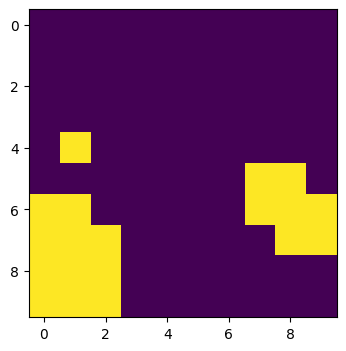

Evaluation 86 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 263.99it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 94.06it/s]


Completed. Saving
Time (s) to complete simulation 86: 0.7374012470245361


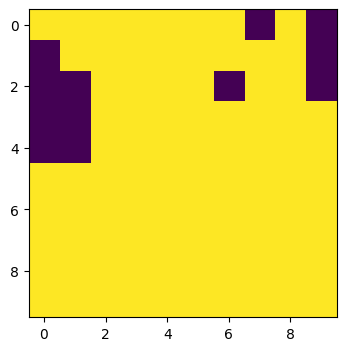

Evaluation 87 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 267.28it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.50it/s] 


Completed. Saving
Time (s) to complete simulation 87: 0.7095918655395508


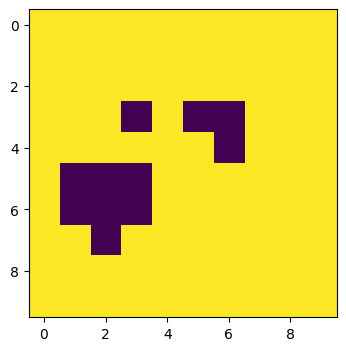

Evaluation 88 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 259.16it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 99.55it/s] 


Completed. Saving
Time (s) to complete simulation 88: 0.726625919342041


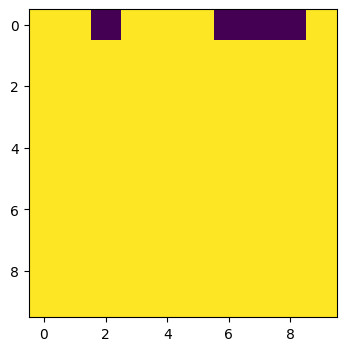

Evaluation 89 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 270.03it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 100.13it/s]


Completed. Saving
Time (s) to complete simulation 89: 0.7019317150115967


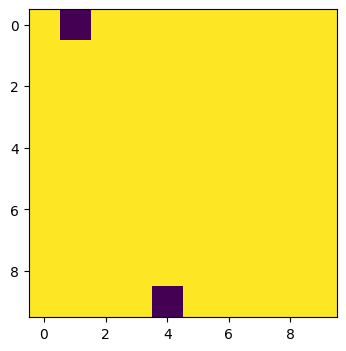

Evaluation 90 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 219.82it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.81it/s] 


Completed. Saving
Time (s) to complete simulation 90: 0.7525908946990967


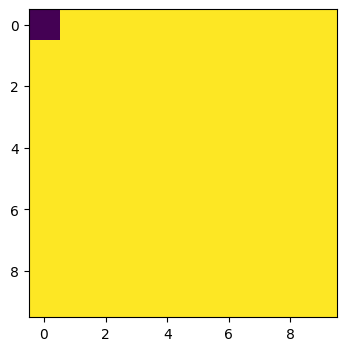

Evaluation 91 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 232.85it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.28it/s]


Completed. Saving
Time (s) to complete simulation 91: 0.7687954902648926


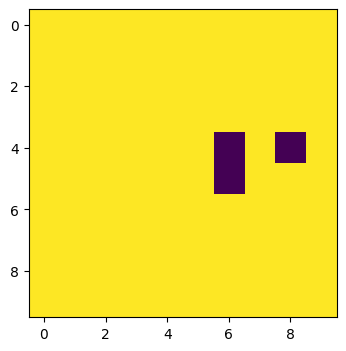

Evaluation 92 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 259.61it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.99it/s] 


Completed. Saving
Time (s) to complete simulation 92: 0.7314431667327881


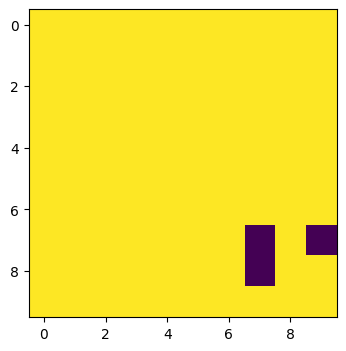

Evaluation 93 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 259.60it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.72it/s]


Completed. Saving
Time (s) to complete simulation 93: 0.729201078414917


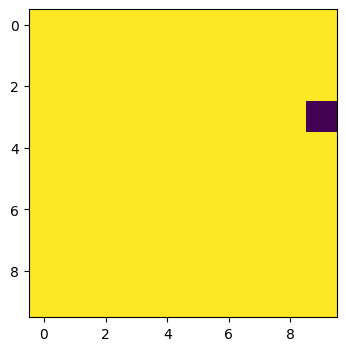

Evaluation 94 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 266.32it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 74.74it/s]


Completed. Saving
Time (s) to complete simulation 94: 0.8870625495910645


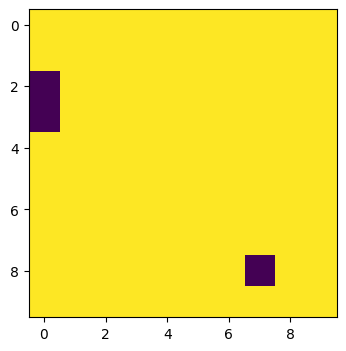

Evaluation 95 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 160.60it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.77it/s]


Completed. Saving
Time (s) to complete simulation 95: 1.1917030811309814


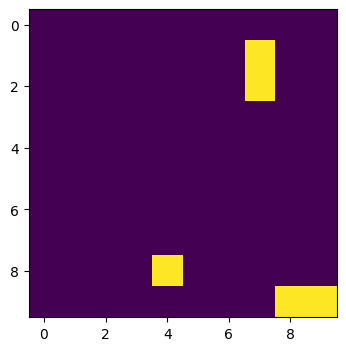

Evaluation 96 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 153.53it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.38it/s]


Completed. Saving
Time (s) to complete simulation 96: 1.2125651836395264


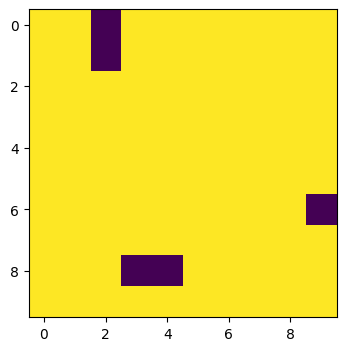

Evaluation 97 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 147.07it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 73.72it/s]


Completed. Saving
Time (s) to complete simulation 97: 1.0351746082305908


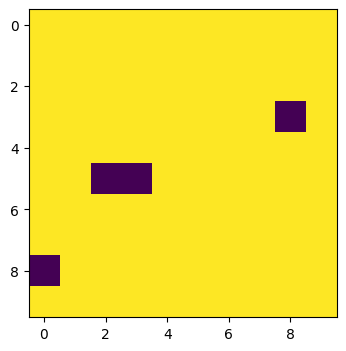

Evaluation 98 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 263.65it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.62it/s]


Completed. Saving
Time (s) to complete simulation 98: 0.7271718978881836


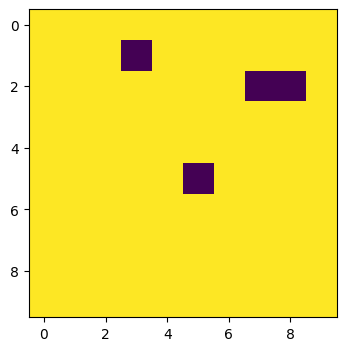

Evaluation 99 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 230.90it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.24it/s] 


Completed. Saving
Time (s) to complete simulation 99: 0.7397911548614502


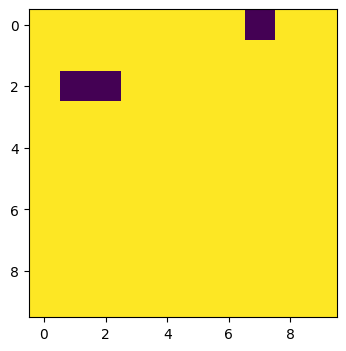

Evaluation 100 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 236.89it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.42it/s] 


Completed. Saving
Time (s) to complete simulation 100: 0.7508730888366699


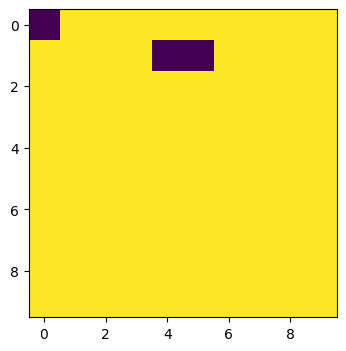

Evaluation 101 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 260.62it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.07it/s]


Completed. Saving
Time (s) to complete simulation 101: 0.7319850921630859


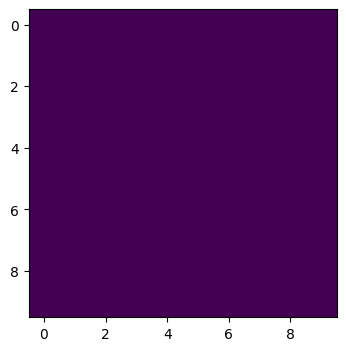

Evaluation 102 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 251.08it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.17it/s]


Completed. Saving
Time (s) to complete simulation 102: 0.7350137233734131


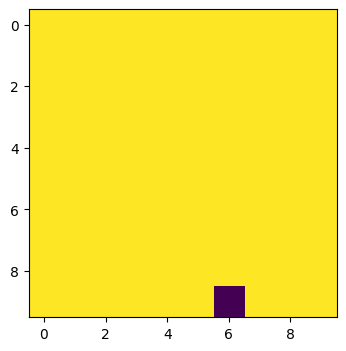

Evaluation 103 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 231.30it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 96.01it/s] 


Completed. Saving
Time (s) to complete simulation 103: 0.7567839622497559


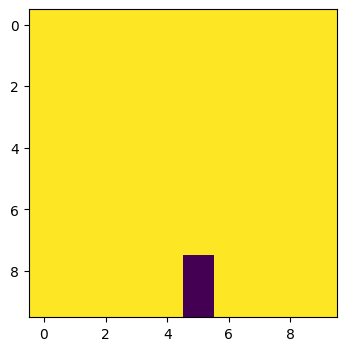

Evaluation 104 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 250.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.46it/s]


Completed. Saving
Time (s) to complete simulation 104: 0.7303316593170166


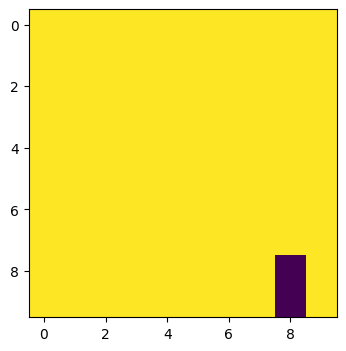

Evaluation 105 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 255.62it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 98.39it/s] 


Completed. Saving
Time (s) to complete simulation 105: 0.7230122089385986


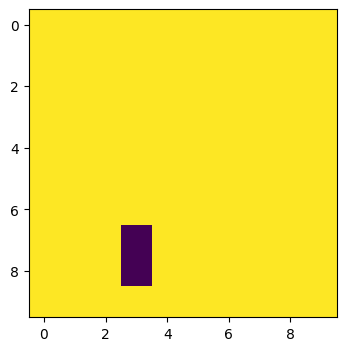

Evaluation 106 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 225.42it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 96.53it/s]


Completed. Saving
Time (s) to complete simulation 106: 0.7571237087249756


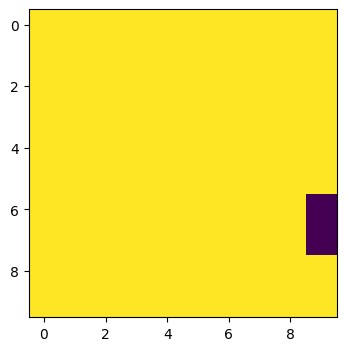

Evaluation 107 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 253.96it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 92.19it/s]


Completed. Saving
Time (s) to complete simulation 107: 0.7584798336029053


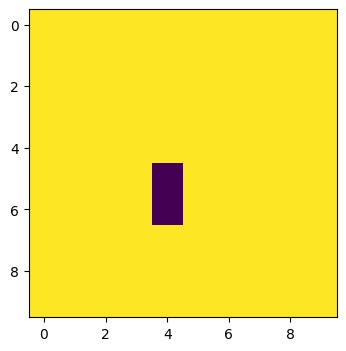

Evaluation 108 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 242.70it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.32it/s]


Completed. Saving
Time (s) to complete simulation 108: 0.76963210105896


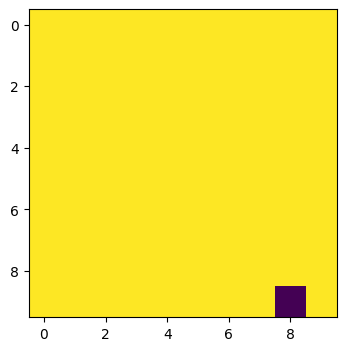

Evaluation 109 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 147.86it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 59.45it/s]


Completed. Saving
Time (s) to complete simulation 109: 1.1998920440673828


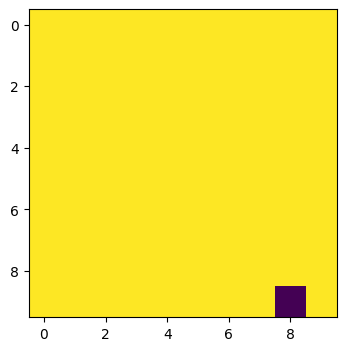

Evaluation 110 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 157.12it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 55.93it/s]


Completed. Saving
Time (s) to complete simulation 110: 1.2299325466156006


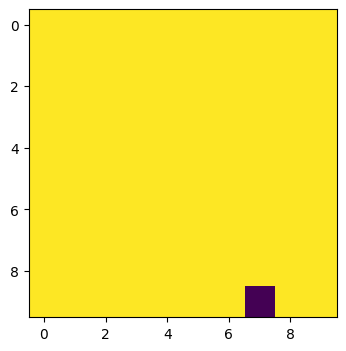

Evaluation 111 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 138.14it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 60.35it/s]


Completed. Saving
Time (s) to complete simulation 111: 1.2070753574371338


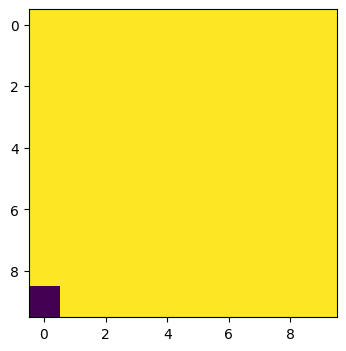

Evaluation 112 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 244.11it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.70it/s]


Completed. Saving
Time (s) to complete simulation 112: 0.7665102481842041


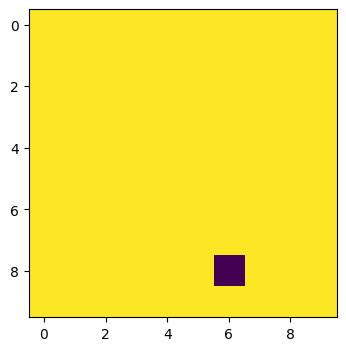

Evaluation 113 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 237.99it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.01it/s]


Completed. Saving
Time (s) to complete simulation 113: 0.7923903465270996


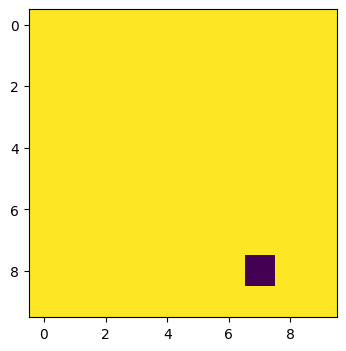

Evaluation 114 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 251.01it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.96it/s]


Completed. Saving
Time (s) to complete simulation 114: 0.7605066299438477


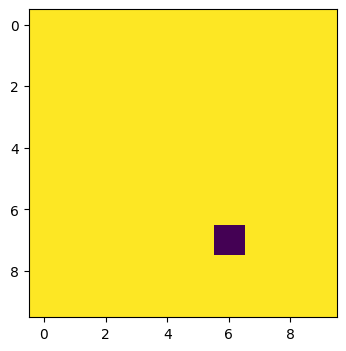

Evaluation 115 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 217.32it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 94.64it/s]


Completed. Saving
Time (s) to complete simulation 115: 0.7783615589141846


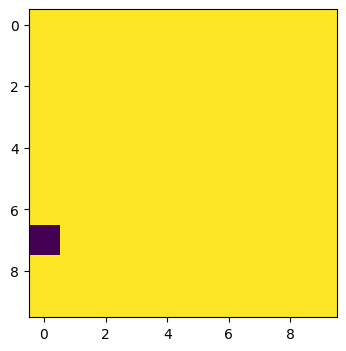

Evaluation 116 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 253.26it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.72it/s] 


Completed. Saving
Time (s) to complete simulation 116: 0.7305505275726318


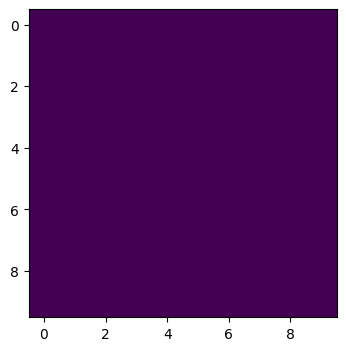

Evaluation 117 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 249.21it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.95it/s]


Completed. Saving
Time (s) to complete simulation 117: 0.729534387588501


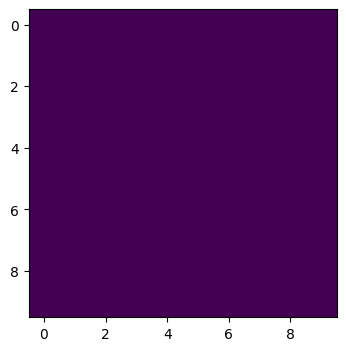

Evaluation 118 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 223.60it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.41it/s]


Completed. Saving
Time (s) to complete simulation 118: 0.7510583400726318


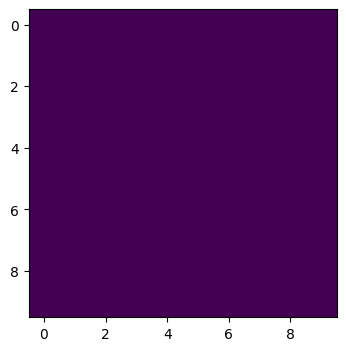

Evaluation 119 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 225.50it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.80it/s]


Completed. Saving
Time (s) to complete simulation 119: 0.7879281044006348


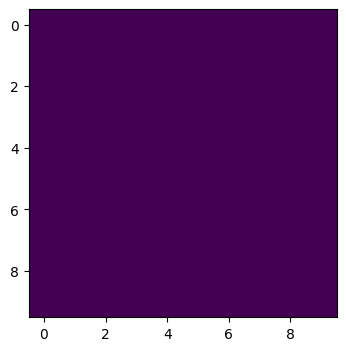

Evaluation 120 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 228.47it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.17it/s] 


Completed. Saving
Time (s) to complete simulation 120: 0.7701966762542725


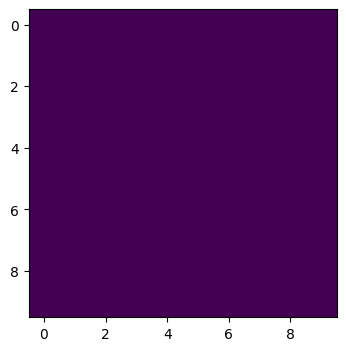

Evaluation 121 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 233.27it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 93.33it/s]


Completed. Saving
Time (s) to complete simulation 121: 0.7693488597869873


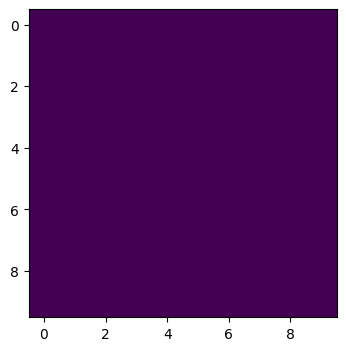

Evaluation 122 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 243.26it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 81.41it/s]


Completed. Saving
Time (s) to complete simulation 122: 0.8353216648101807


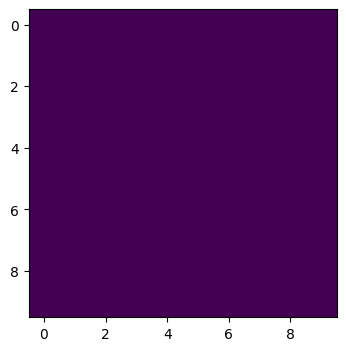

Evaluation 123 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 142.27it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 54.78it/s]


Completed. Saving
Time (s) to complete simulation 123: 1.2870497703552246


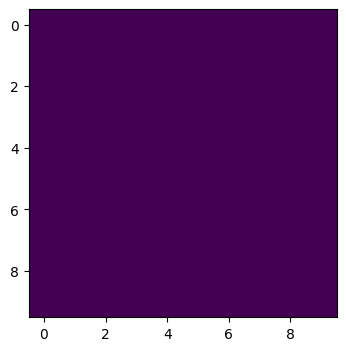

Evaluation 124 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 157.70it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 60.07it/s]


Completed. Saving
Time (s) to complete simulation 124: 1.1737284660339355


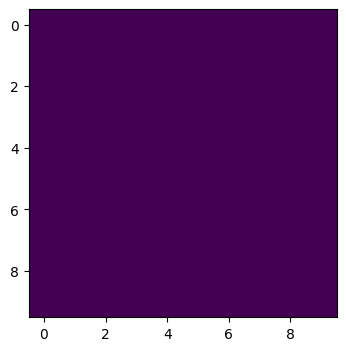

Evaluation 125 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 148.22it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 55.44it/s]


Completed. Saving
Time (s) to complete simulation 125: 1.2573215961456299


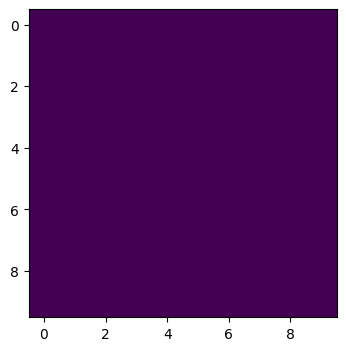

Evaluation 126 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 156.53it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 87.16it/s]


Completed. Saving
Time (s) to complete simulation 126: 0.9116637706756592


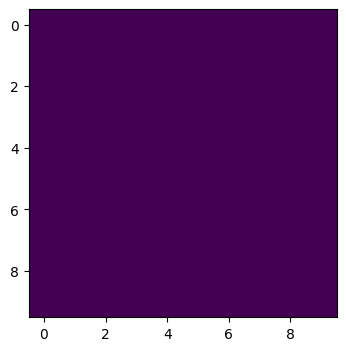

Evaluation 127 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 242.01it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.66it/s]


Completed. Saving
Time (s) to complete simulation 127: 0.7709097862243652


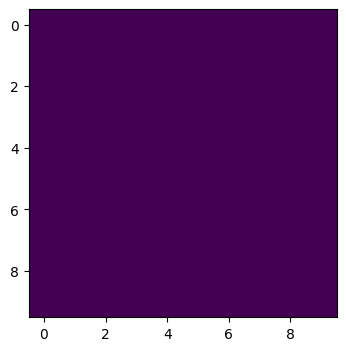

Evaluation 128 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 228.02it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.98it/s]


Completed. Saving
Time (s) to complete simulation 128: 0.7808024883270264


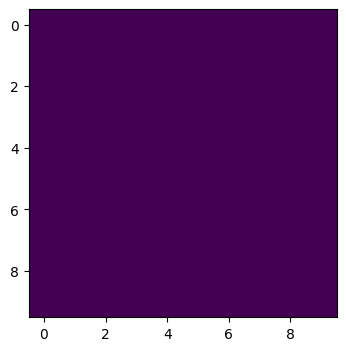

Evaluation 129 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 228.05it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.01it/s]


Completed. Saving
Time (s) to complete simulation 129: 0.7521078586578369


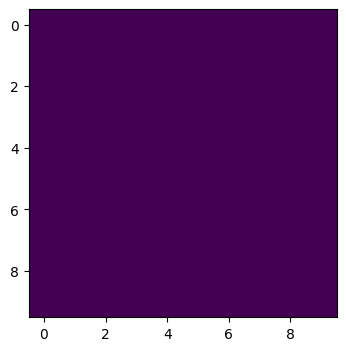

Evaluation 130 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 213.41it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 97.09it/s] 


Completed. Saving
Time (s) to complete simulation 130: 0.7624428272247314


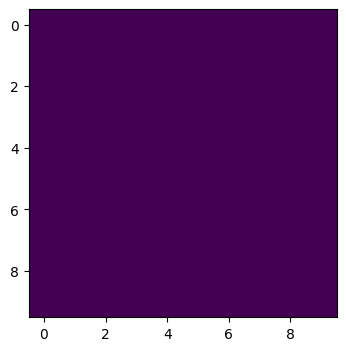

Evaluation 131 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 218.08it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 94.19it/s]


Completed. Saving
Time (s) to complete simulation 131: 0.7827506065368652


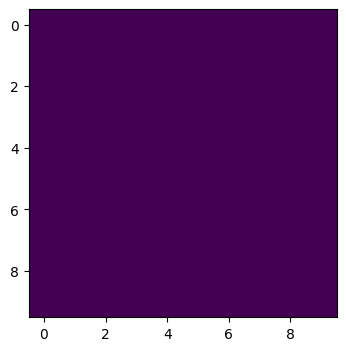

Evaluation 132 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 221.38it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.49it/s]


Completed. Saving
Time (s) to complete simulation 132: 0.7685611248016357


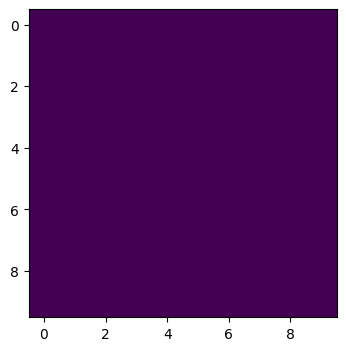

Evaluation 133 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 233.03it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 93.64it/s]


Completed. Saving
Time (s) to complete simulation 133: 0.7664749622344971


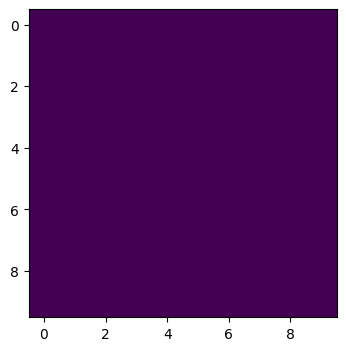

Evaluation 134 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 235.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.70it/s]


Completed. Saving
Time (s) to complete simulation 134: 0.7761070728302002


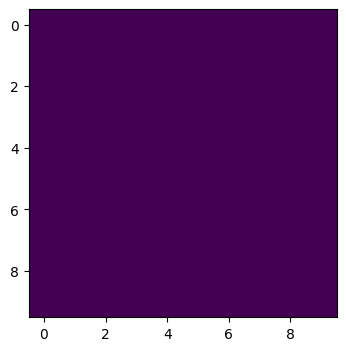

Evaluation 135 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 244.40it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 93.16it/s]


Completed. Saving
Time (s) to complete simulation 135: 0.7590773105621338


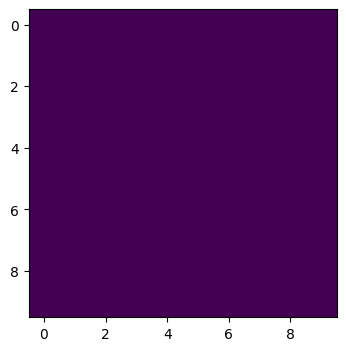

Evaluation 136 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 227.72it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 93.04it/s]


Completed. Saving
Time (s) to complete simulation 136: 0.7763137817382812


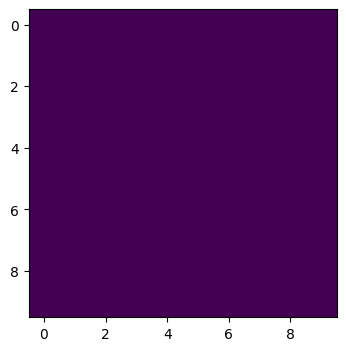

Evaluation 137 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 219.12it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.30it/s]


Completed. Saving
Time (s) to complete simulation 137: 1.1058237552642822


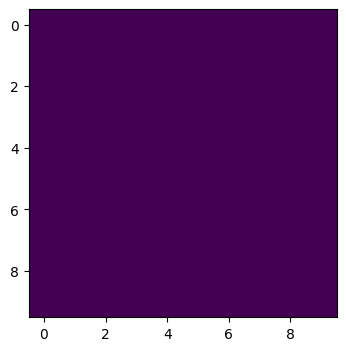

Evaluation 138 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 151.42it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.57it/s]


Completed. Saving
Time (s) to complete simulation 138: 1.20534086227417


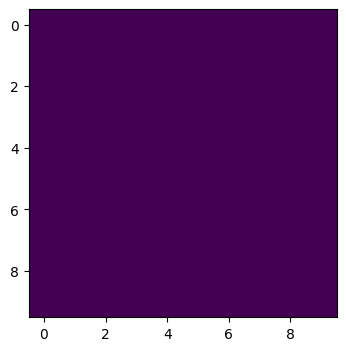

Evaluation 139 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 142.95it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 50.09it/s]


Completed. Saving
Time (s) to complete simulation 139: 1.367931842803955


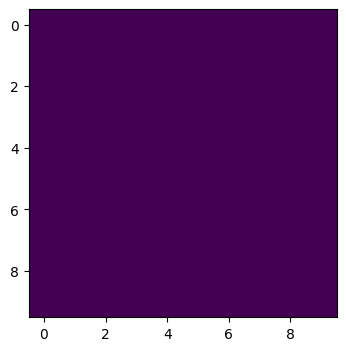

Evaluation 140 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 155.69it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.76it/s]


Completed. Saving
Time (s) to complete simulation 140: 0.8859822750091553


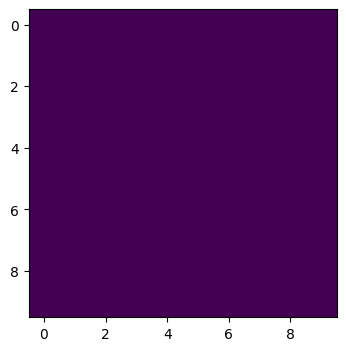

Evaluation 141 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 226.85it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.03it/s]


Completed. Saving
Time (s) to complete simulation 141: 0.7873444557189941


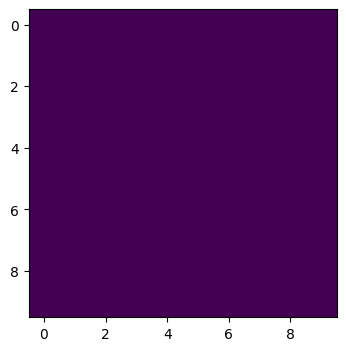

Evaluation 142 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 206.36it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.64it/s]


Completed. Saving
Time (s) to complete simulation 142: 0.7826664447784424


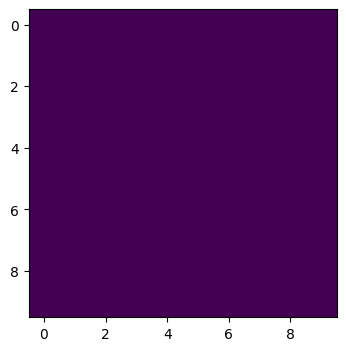

Evaluation 143 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 209.86it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 94.42it/s]


Completed. Saving
Time (s) to complete simulation 143: 0.7888524532318115


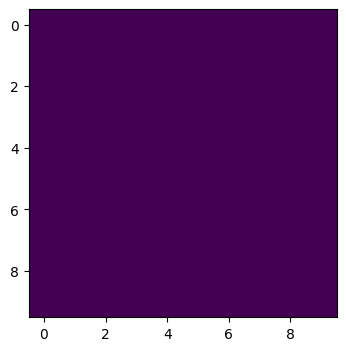

Evaluation 144 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 232.83it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 87.62it/s]


Completed. Saving
Time (s) to complete simulation 144: 0.8002443313598633


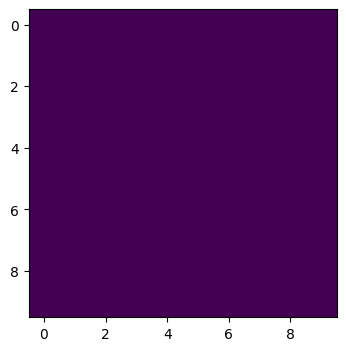

Evaluation 145 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 234.78it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 89.87it/s]


Completed. Saving
Time (s) to complete simulation 145: 0.7859582901000977


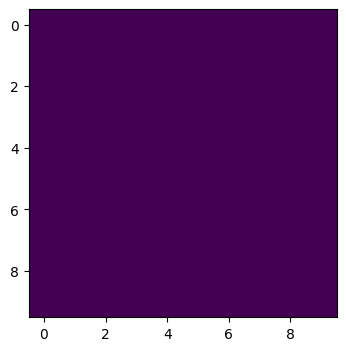

Evaluation 146 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 233.78it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 91.89it/s]


Completed. Saving
Time (s) to complete simulation 146: 0.7756974697113037


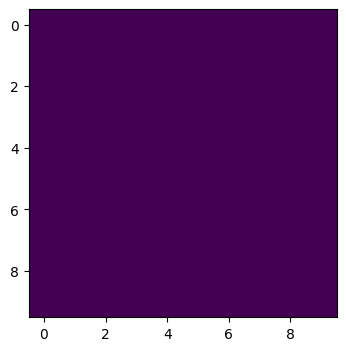

Evaluation 147 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 226.47it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 89.65it/s]


Completed. Saving
Time (s) to complete simulation 147: 0.8011205196380615


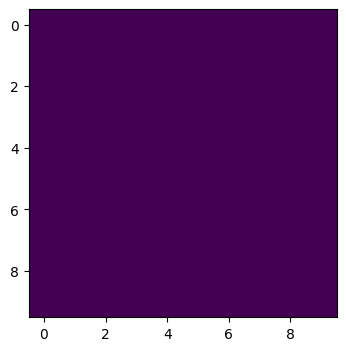

Evaluation 148 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 227.57it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 89.67it/s]


Completed. Saving
Time (s) to complete simulation 148: 0.8016321659088135


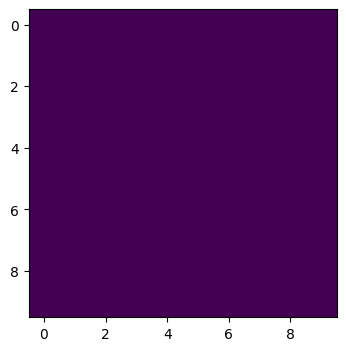

Evaluation 149 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 218.09it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 94.07it/s]


Completed. Saving
Time (s) to complete simulation 149: 0.7775657176971436


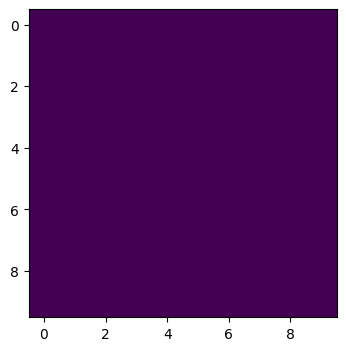

Evaluation 150 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 211.48it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 95.25it/s]


Completed. Saving
Time (s) to complete simulation 150: 0.7754192352294922


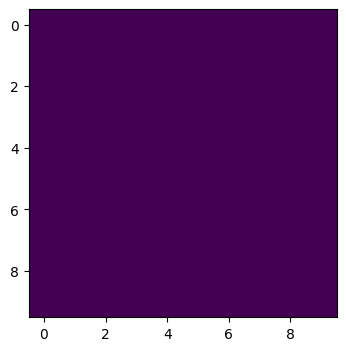

Evaluation 151 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 149.99it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 55.36it/s]


Completed. Saving
Time (s) to complete simulation 151: 1.254098653793335


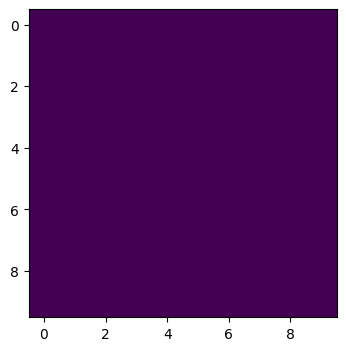

Evaluation 152 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 145.76it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.55it/s]


Completed. Saving
Time (s) to complete simulation 152: 1.2198755741119385


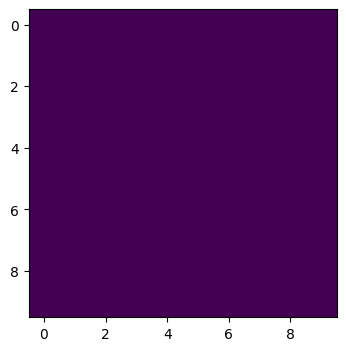

Evaluation 153 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 135.48it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 50.91it/s]


Completed. Saving
Time (s) to complete simulation 153: 1.3701910972595215


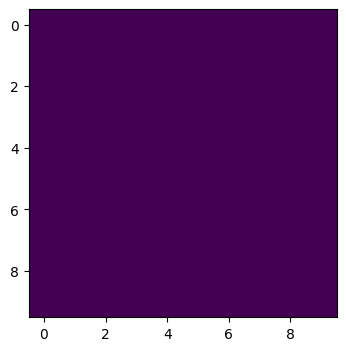

Evaluation 154 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 135.63it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.11it/s]


Completed. Saving
Time (s) to complete simulation 154: 0.9395759105682373


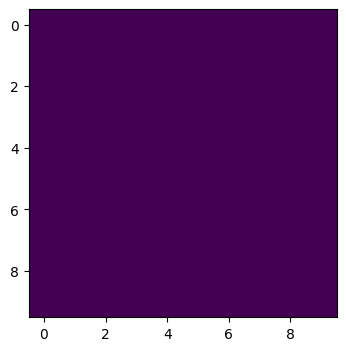

Evaluation 155 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 227.07it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.55it/s]


Completed. Saving
Time (s) to complete simulation 155: 0.7890410423278809


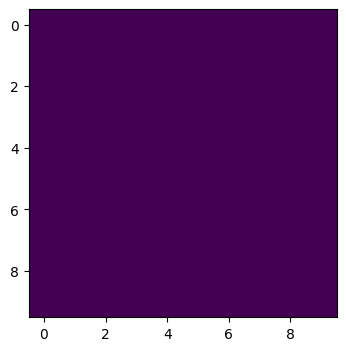

Evaluation 156 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 208.20it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.49it/s]


Completed. Saving
Time (s) to complete simulation 156: 0.8062152862548828


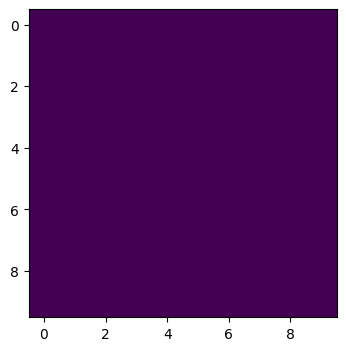

Evaluation 157 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 231.65it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 92.50it/s]


Completed. Saving
Time (s) to complete simulation 157: 0.7750494480133057


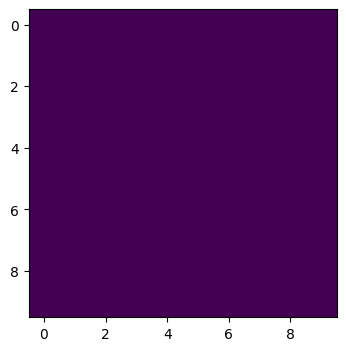

Evaluation 158 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 208.70it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 94.05it/s]


Completed. Saving
Time (s) to complete simulation 158: 0.7869822978973389


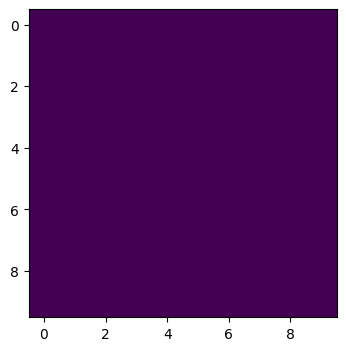

Evaluation 159 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 211.58it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.76it/s]


Completed. Saving
Time (s) to complete simulation 159: 0.8054409027099609


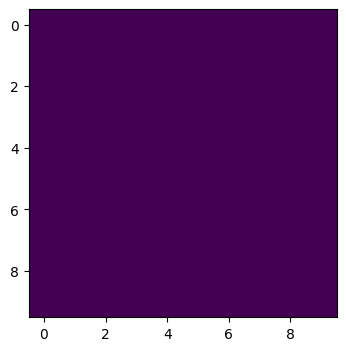

Evaluation 160 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 216.29it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.86it/s]


Completed. Saving
Time (s) to complete simulation 160: 0.7978620529174805


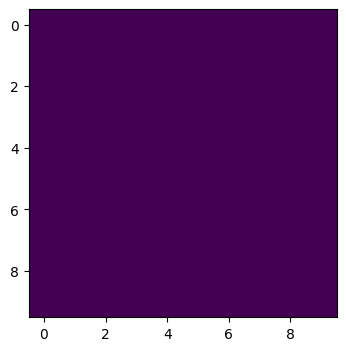

Evaluation 161 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 224.30it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 89.51it/s]


Completed. Saving
Time (s) to complete simulation 161: 0.7970614433288574


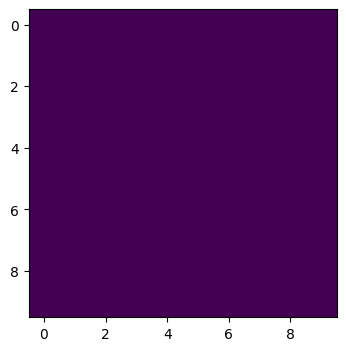

Evaluation 162 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 233.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.52it/s]


Completed. Saving
Time (s) to complete simulation 162: 0.7916932106018066


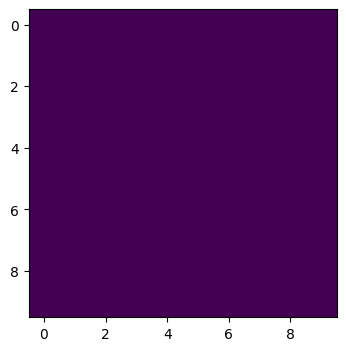

Evaluation 163 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 224.27it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.19it/s]


Completed. Saving
Time (s) to complete simulation 163: 0.7960317134857178


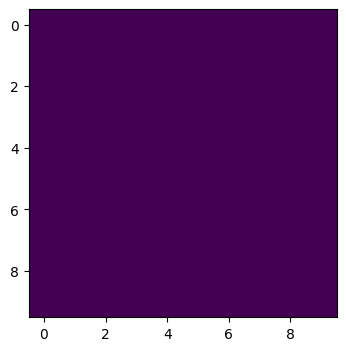

Evaluation 164 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 213.13it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 70.48it/s]


Completed. Saving
Time (s) to complete simulation 164: 0.9610953330993652


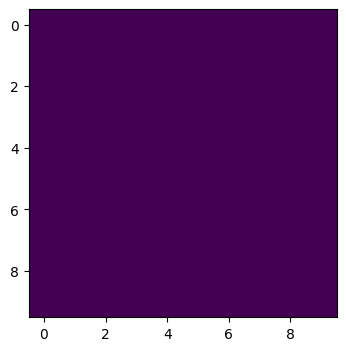

Evaluation 165 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 148.26it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 54.40it/s]


Completed. Saving
Time (s) to complete simulation 165: 1.279054880142212


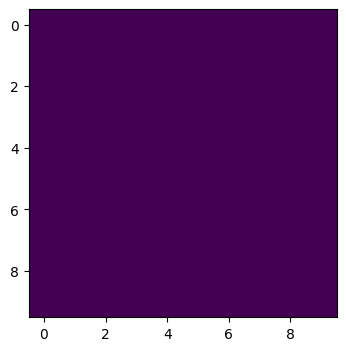

Evaluation 166 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 130.23it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 55.70it/s]


Completed. Saving
Time (s) to complete simulation 166: 1.3038122653961182


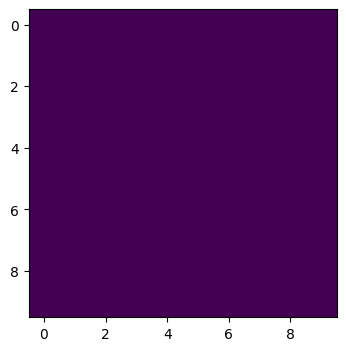

Evaluation 167 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 145.30it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 59.17it/s]


Completed. Saving
Time (s) to complete simulation 167: 1.206986665725708


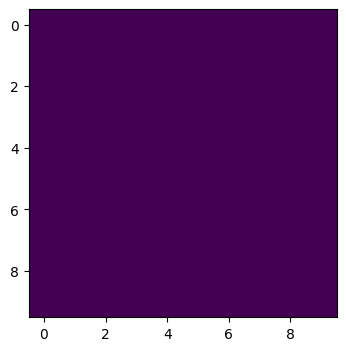

Evaluation 168 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 225.75it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 85.98it/s]


Completed. Saving
Time (s) to complete simulation 168: 0.8361561298370361


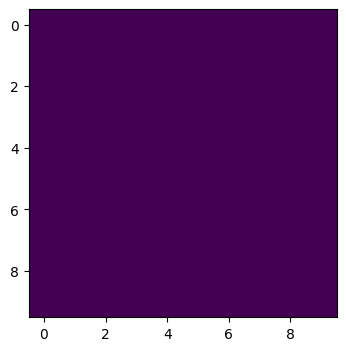

Evaluation 169 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 217.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 88.71it/s]


Completed. Saving
Time (s) to complete simulation 169: 0.8104140758514404


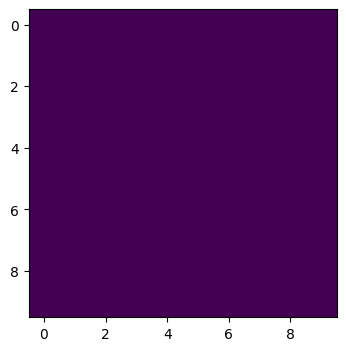

Evaluation 170 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 223.64it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 86.28it/s]


Completed. Saving
Time (s) to complete simulation 170: 0.8232746124267578


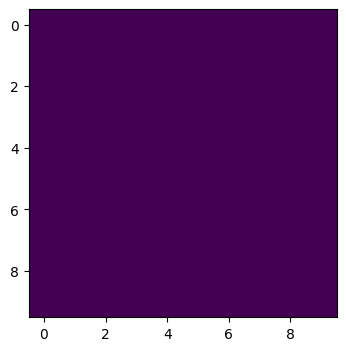

Evaluation 171 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 214.07it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 88.53it/s]


Completed. Saving
Time (s) to complete simulation 171: 0.8146958351135254


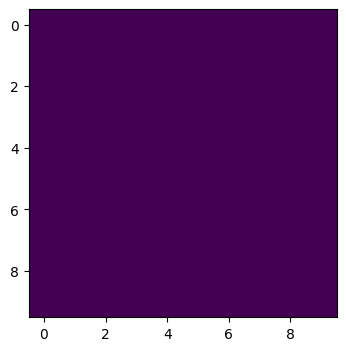

Evaluation 172 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 220.75it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 86.12it/s]


Completed. Saving
Time (s) to complete simulation 172: 0.8223347663879395


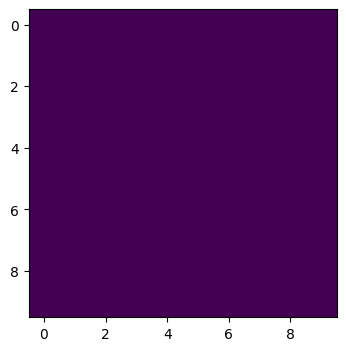

Evaluation 173 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 218.33it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 88.18it/s]


Completed. Saving
Time (s) to complete simulation 173: 0.814539909362793


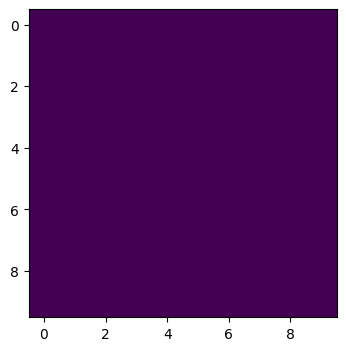

Evaluation 174 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 211.32it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 87.26it/s]


Completed. Saving
Time (s) to complete simulation 174: 0.8285872936248779


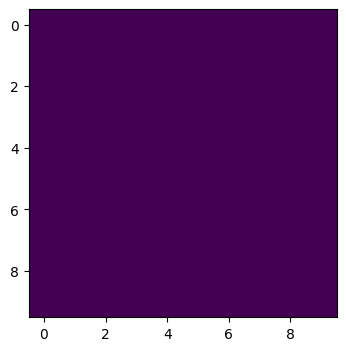

Evaluation 175 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 206.13it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 86.20it/s]


Completed. Saving
Time (s) to complete simulation 175: 0.8406574726104736


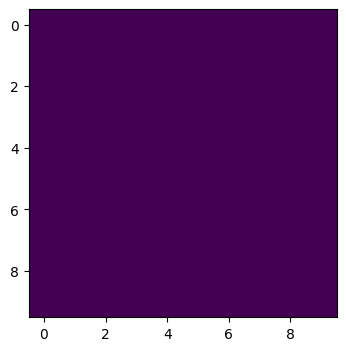

Evaluation 176 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 212.69it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 90.93it/s]


Completed. Saving
Time (s) to complete simulation 176: 0.8053975105285645


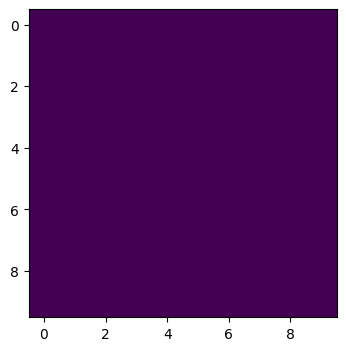

Evaluation 177 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 220.09it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 88.62it/s]


Completed. Saving
Time (s) to complete simulation 177: 0.808521032333374


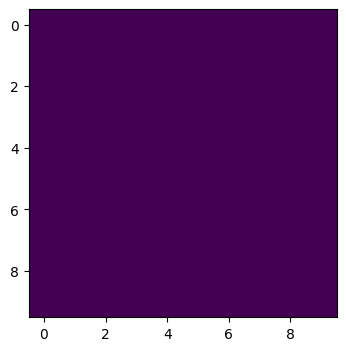

Evaluation 178 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 152.32it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.05it/s]


Completed. Saving
Time (s) to complete simulation 178: 1.208928108215332


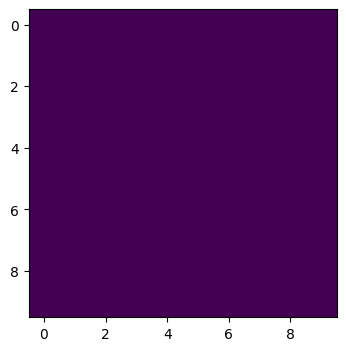

Evaluation 179 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 147.28it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.74it/s]


Completed. Saving
Time (s) to complete simulation 179: 1.2125444412231445


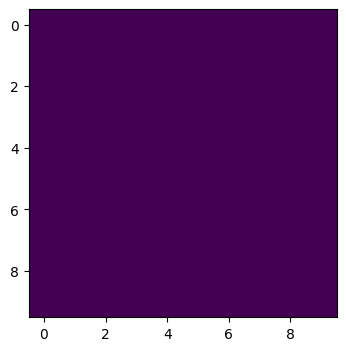

Evaluation 180 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 154.48it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.35it/s]


Completed. Saving
Time (s) to complete simulation 180: 1.2346713542938232


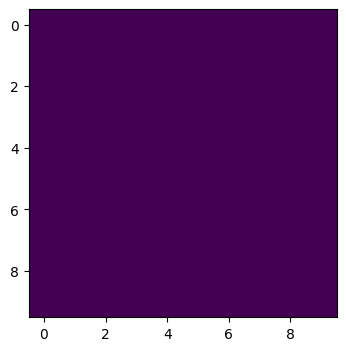

Evaluation 181 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 146.60it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.11it/s]


Completed. Saving
Time (s) to complete simulation 181: 1.2528901100158691


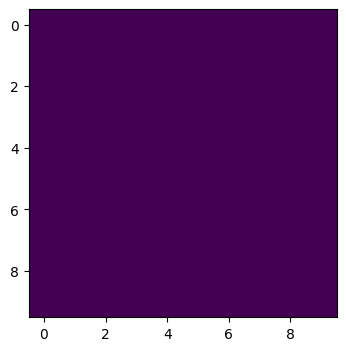

Evaluation 182 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 149.03it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 87.87it/s]


Completed. Saving
Time (s) to complete simulation 182: 0.9258320331573486


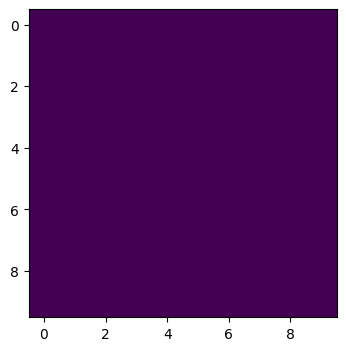

Evaluation 183 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 223.15it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 87.58it/s]


Completed. Saving
Time (s) to complete simulation 183: 0.8167078495025635


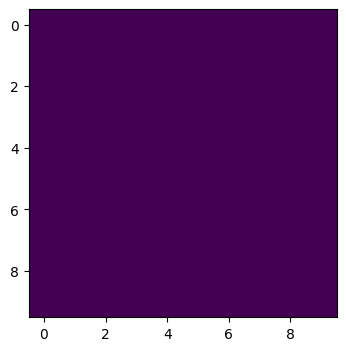

Evaluation 184 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 215.04it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 87.85it/s]


Completed. Saving
Time (s) to complete simulation 184: 0.8260233402252197


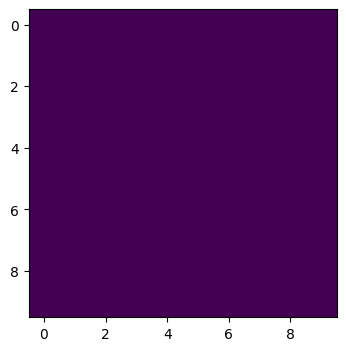

Evaluation 185 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 209.62it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 89.96it/s]


Completed. Saving
Time (s) to complete simulation 185: 0.8127560615539551


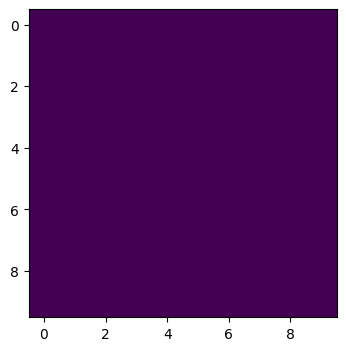

Evaluation 186 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 201.73it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 58.06it/s]


Completed. Saving
Time (s) to complete simulation 186: 1.1307668685913086


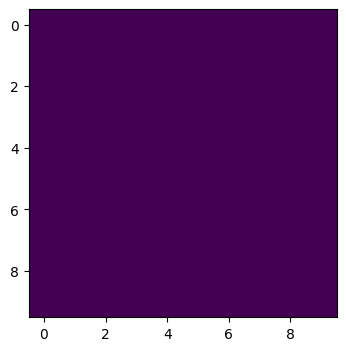

Evaluation 187 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 115.23it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.72it/s]


Completed. Saving
Time (s) to complete simulation 187: 1.3226892948150635


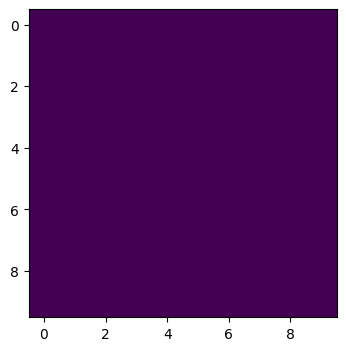

Evaluation 188 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 133.68it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 53.82it/s]


Completed. Saving
Time (s) to complete simulation 188: 1.3184256553649902


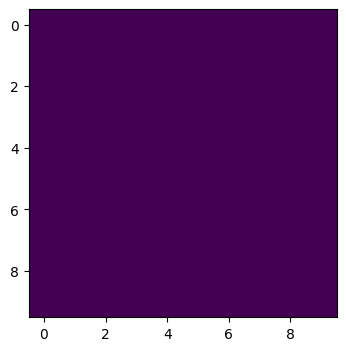

Evaluation 189 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 160.40it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.63it/s]


Completed. Saving
Time (s) to complete simulation 189: 1.2179715633392334


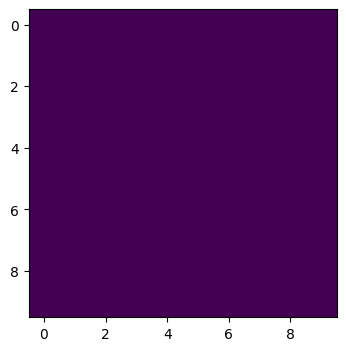

Evaluation 190 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 194.52it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 61.77it/s]


Completed. Saving
Time (s) to complete simulation 190: 1.0877299308776855


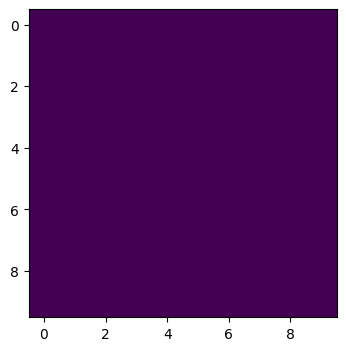

Evaluation 191 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 130.97it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 57.99it/s]


Completed. Saving
Time (s) to complete simulation 191: 1.2694323062896729


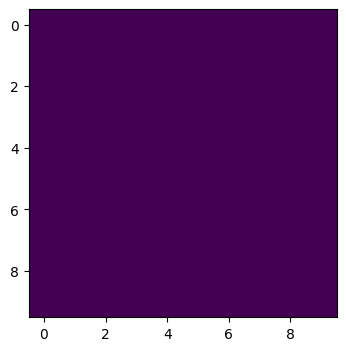

Evaluation 192 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 139.13it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 56.00it/s]


Completed. Saving
Time (s) to complete simulation 192: 1.2744982242584229


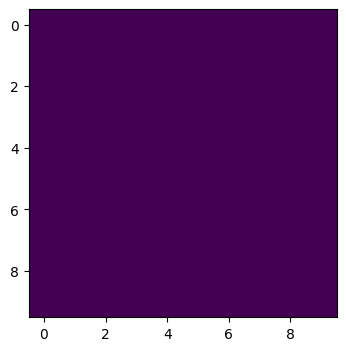

Evaluation 193 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 134.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 53.85it/s]


Completed. Saving
Time (s) to complete simulation 193: 1.3182756900787354


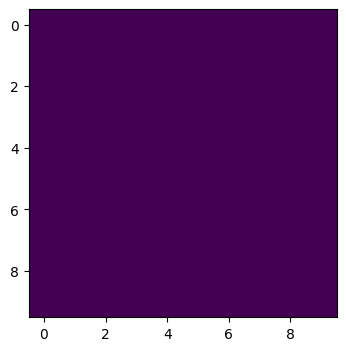

Evaluation 194 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 207.93it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 84.63it/s]


Completed. Saving
Time (s) to complete simulation 194: 0.8464245796203613


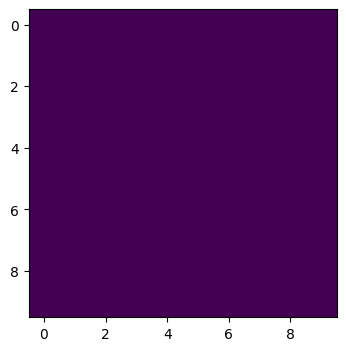

Evaluation 195 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 212.22it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 84.45it/s]


Completed. Saving
Time (s) to complete simulation 195: 0.8459053039550781


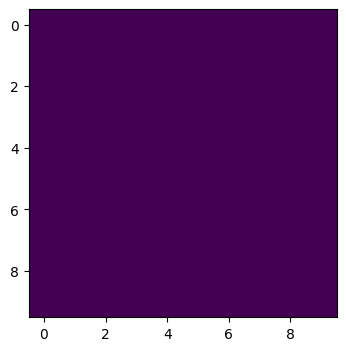

Evaluation 196 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 187.41it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 83.79it/s]


Completed. Saving
Time (s) to complete simulation 196: 0.8777801990509033


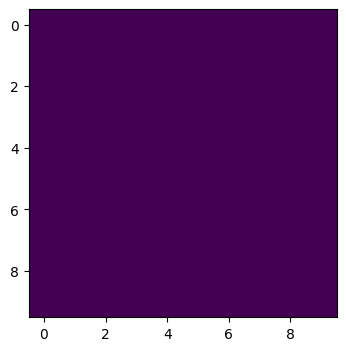

Evaluation 197 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 199.92it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 83.79it/s]


Completed. Saving
Time (s) to complete simulation 197: 0.8646669387817383


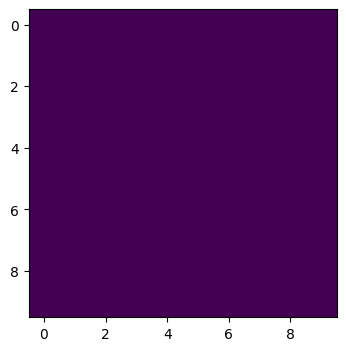

Evaluation 198 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 206.30it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 84.09it/s]


Completed. Saving
Time (s) to complete simulation 198: 0.8561582565307617


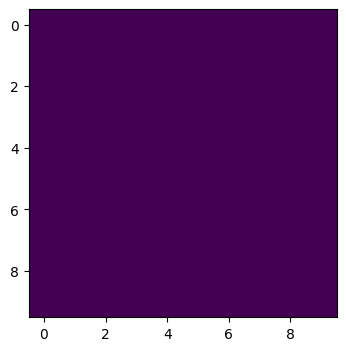

Evaluation 199 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 203.49it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 83.79it/s]


Completed. Saving
Time (s) to complete simulation 199: 0.8575646877288818


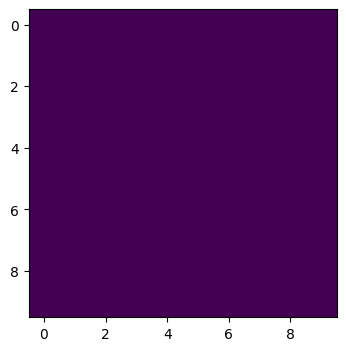

Evaluation 200 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 203.41it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 83.83it/s]


Completed. Saving
Time (s) to complete simulation 200: 0.8659853935241699


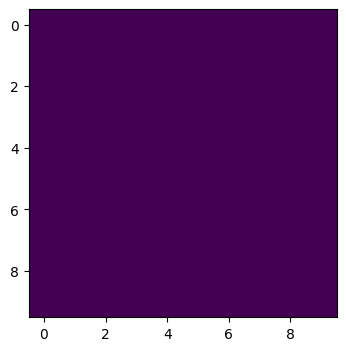

Evaluation 201 of 201

---Performing Equlibration---



100%|██████████| 50/50 [00:00<00:00, 211.20it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 50/50 [00:00<00:00, 84.72it/s]


Completed. Saving
Time (s) to complete simulation 201: 0.8426694869995117


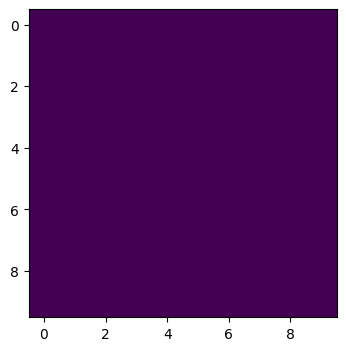

In [ ]:
Jx = xs

results_dict = {}
approx_ys = np.zeros(xs.shape[0])
approx_ys1 = np.zeros(xs.shape[0])
approx_ys2 = np.zeros(xs.shape[0])

time_eval = np.zeros(xs.shape[0])

for i in range(0, Jx.shape[0]):
    J_mat = np.array([[0,0,0,0,0],
                      [0,0,Jx[i],0,0],
                      [0,Jx[i],0,Jx[i],0],
                      [0,0,Jx[i],0,0],
                      [0,0,0,0,0]])
    print("Evaluation " +str (i+1) +" of " +str(N_total))
    start_time = time.time()
    np.random.seed(0)
    sq_sim = IsingSim(N = 10, J_mat = J_mat, T = 2.7, save_trajectories=True, eqSteps = 50, mcSteps = 50)  # Intializing the object
    sq_sim.performIsingSim()   # Running the sim
    end_time = time.time()
    time_eval[i]= end_time-start_time
    print("Time (s) to complete simulation " +str(i+1)+ ": " +str(time_eval[i]))
    results_dict[i] = {'sim': sq_sim.results,}

    approx_ys[i] = results_dict[i]['sim']['SpecificHeat']
    approx_ys1[i] = results_dict[i]['sim']['Magnetization']
    approx_ys2[i] = results_dict[i]['sim']['Susceptibility']

    plt.imshow(results_dict[i]['sim']['config'][-1])
    plt.show()

(0.8728715412652315, 0.20620706131403144)

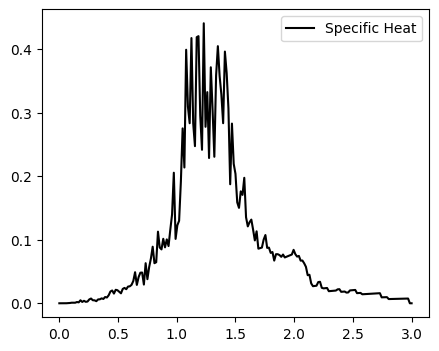

In [ ]:
plt.plot(xs, approx_ys, "k", label="Specific Heat")
plt.legend(loc="best")
np.mean(time_eval), np.std(time_eval)

# Symbolic Regression


Here, we explore the symbolic regression over the Ising model predictions.

## Specific Heat

In [ ]:
inputs2 = xs.reshape(-1, 1)
outputs2 = approx_ys

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-", "+", "/"], unary_operators=["square", "exp", "log", "tanh"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:1007: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(


In [ ]:
model.fit(inputs2, outputs2)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.420e+05
Progress: 185 / 3100 total iterations (5.968%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.789e+00  1.594e+01  y = x₀
2           1.190e-02  5.457e+00  y = tanh(square(-0.29442))
4           1.082e-02  4.767e-02  y = tanh(square(x₀)) * 0.11189
5           7.437e-03  3.745e-01  y = square(x₀ / exp(x₀))
6           7.137e-03  4.117e-02  y = (x₀ / exp(x₀)) - 0.17967
9           7.090e-03  2.204e-03  y = tanh(x₀) * (x₀ - (tanh(x₀) * x₀))
10          5.089e-03  3.317e-01  y = tanh(square(x₀)) * (x₀ - (x₀ * tanh(x₀)))
11          3.908e-03  2.641e-01  y = tanh(square(square(x₀))) * (x₀ - (x₀ * tanh(x₀)))
12          3.003e-03  2.634e-01  y = tanh(square(square(x₀))) * ((x₀ - (x₀ * tanh(x₀))) / 0...
                                      .

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                                 x0   
	1        5.457292                          tanh(square(-0.29442084))   
	2        0.047671                      tanh(square(x0)) * 0.11189467   
	3        0.374463                               square(x0 / exp(x0))   
	4        0.041167                        (x0 / exp(x0)) - 0.17967004   
	5        0.002204                  tanh(x0) * (x0 - (tanh(x0) * x0))   
	6        0.331658          tanh(square(x0)) * (x0 - (x0 * tanh(x0)))   
	7  >>>>  0.264106  tanh(square(square(x0))) * (x0 - (x0 * tanh(x0)))   
	8        0.263378  tanh(square(square(x0))) * ((x0 - (x0 * tanh(x...   
	
	       loss  complexity  
	0  2.789404           1  
	1  0.011897           2  
	2  0.010815           4  
	3  0.007437           5  
	4  0.007137           6  
	5  0.007090           9  
	6  0.005089          10  
	7  0.003908          11  
	8  0.003003          12  
]

  - outputs/20250209_225941_uF9z0L/hall_of_fame.csv


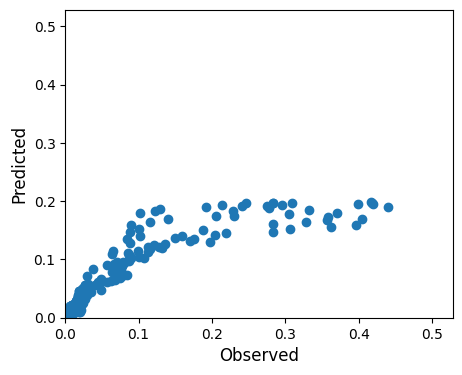

In [ ]:
plt.figure()
plt.scatter(outputs2, model.predict(inputs2), label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.xlim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.ylim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.show()

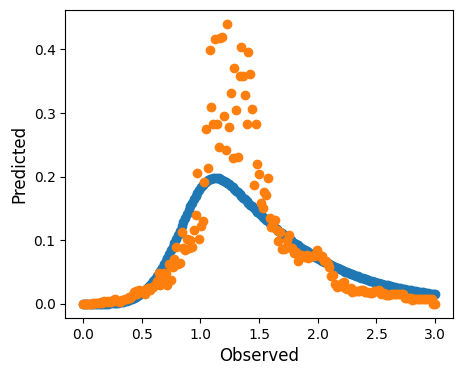

In [ ]:
plt.figure()
plt.scatter(inputs2, model.predict(inputs2), label='Training data')
plt.scatter(inputs2,outputs2, label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs2, model.predict(inputs2))
print(f'Best identified model (LaTeX): {model.latex()}')
print(f'R2 score: {r2}')

Best identified model (LaTeX): \left(- x_{0} \tanh{\left(x_{0} \right)} + x_{0}\right) \tanh{\left(x_{0}^{4} \right)}
R2 score: 0.6715419589060885


## Magnetization

In [ ]:
inputs2 = xs.reshape(-1, 1)
outputs2 = approx_ys1

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-", "+", "/"], unary_operators=["square", "exp", "log", "tanh"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:1007: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(


In [ ]:
model.fit(inputs2, outputs2)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.480e+04
Progress: 84 / 3100 total iterations (2.710%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.006e+00  1.594e+01  y = x₀
2           5.007e-02  3.001e+00  y = tanh(x₀)
3           1.830e-02  1.007e+00  y = square(tanh(x₀))
4           7.737e-03  8.608e-01  y = tanh(square(x₀ + -0.33266))
6           6.005e-03  1.267e-01  y = tanh(square(x₀ + -0.38389) - -0.080073)
7           5.130e-03  1.576e-01  y = tanh(square(square(0.44289 - x₀) - -0.31503))
9           5.130e-03  5.364e-07  y = tanh(square((0.37798 - x₀) - square(x₀ + -0.94291)))
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Pr

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.006e+00  1.594e+01  y = x₀
2           5.007e-02  3.001e+00  y = tanh(x₀)
3           1.830e-02  1.007e+00  y = square(tanh(x₀))
4           7.737e-03  8.608e-01  y = tanh(square(x₀ + -0.33266))
6           6.005e-03  1.267e-01  y = tanh(square(x₀ + -0.38389) - -0.080073)
7           5.130e-03  1.576e-01  y = tanh(square(square(0.44289 - x₀) - -0.31503))
9           5.130e-03  5.364e-07  y = tanh(square((0.37798 - x₀) - square(x₀ + -0.94291)))
───────────────────────────────────────────────────────────────────────────────────────────────────


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                                 x0   
	1        3.000587e+00                                           tanh(x0)   
	2        1.006681e+00                                   square(tanh(x0))   
	3        8.607684e-01                     tanh(square(x0 + -0.33266333))   
	4        1.267168e-01       tanh(square(x0 + -0.38388982) - -0.08007271)   
	5  >>>>  1.575649e-01  tanh(square(square(0.4428884 - x0) - -0.315032...   
	6        5.945992e-07  tanh(square((0.37798417 - x0) - square(x0 + -0...   
	
	       loss  complexity  
	0  1.006309           1  
	1  0.050072           2  
	2  0.018298           3  
	3  0.007737           4  
	4  0.006005           6  
	5  0.005130           7  
	6  0.005130           9  
]

  - outputs/20250209_230051_vNGPYM/hall_of_fame.csv


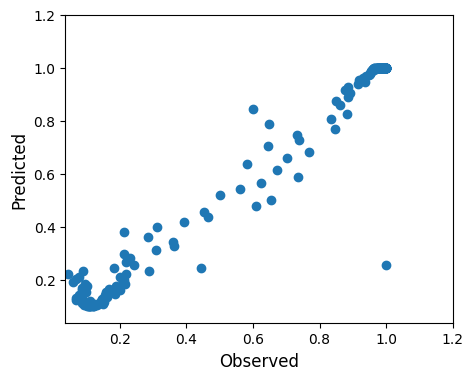

In [ ]:
plt.figure()
plt.scatter(outputs2, model.predict(inputs2), label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.xlim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.ylim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.show()

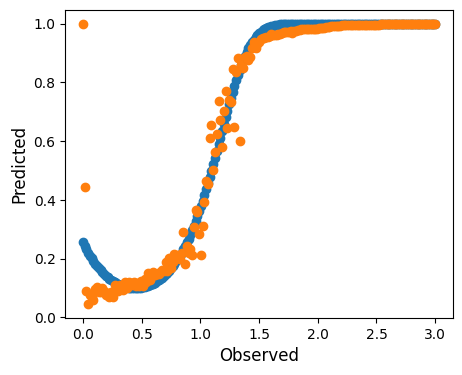

In [ ]:
plt.figure()
plt.scatter(inputs2, model.predict(inputs2), label='Training data')
plt.scatter(inputs2,outputs2, label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs2, model.predict(inputs2))
print(f'Best identified model (LaTeX): {model.latex()}')
print(f'R2 score: {r2}')

Best identified model (LaTeX): \tanh{\left(\left(\left(0.443 - x_{0}\right)^{2} - -0.315\right)^{2} \right)}
R2 score: 0.9652854209867925


## Susceptibility

In [ ]:
inputs2 = xs.reshape(-1, 1)
outputs2 = approx_ys2

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-", "+", "/"], unary_operators=["square", "exp", "log", "tanh"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:1007: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(


In [ ]:
model.fit(inputs2, outputs2)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.530e+05
Progress: 174 / 3100 total iterations (5.613%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           4.313e-01  7.971e+00  y = tanh(exp(-0.89751))
3           4.313e-01  1.788e-06  y = exp(-0.97966) / 0.97347
4           3.740e-01  1.425e-01  y = square(tanh(x₀ + -2.5872))
6           2.440e-01  2.137e-01  y = 0.89802 - tanh(square(x₀ + -1.0235))
8           1.720e-01  1.747e-01  y = 1.163 - tanh(square((x₀ + -1.0825) / 0.44279))
10          1.690e-01  8.918e-03  y = square(square((x₀ / 1.4237) + -1.9498) * tanh(square(x...
                                      ₀)))
11          1.330e-01  2.398e-01  y = square(square((x₀ / 1.0377) + -2.2841) * tanh(square(s...
                                      quare(x₀))))
─────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                             tanh(exp(-0.89751154))   
	1        0.000002                        exp(-0.979662) / 0.97346866   
	2        0.142524                      square(tanh(x0 + -2.5872076))   
	3        0.213652         0.89801854 - tanh(square(x0 + -1.0234737))   
	4        0.174658  1.162954 - tanh(square((x0 + -1.0824636) / 0.4...   
	5        0.008918  square(square((x0 / 1.4237149) + -1.9498332) *...   
	6  >>>>  0.239797  square(square((x0 / 1.0377171) + -2.2840528) *...   
	
	       loss  complexity  
	0  0.431345           2  
	1  0.431344           3  
	2  0.374047           4  
	3  0.243978           6  
	4  0.172046           8  
	5  0.169005          10  
	6  0.132971          11  
]

  - outputs/20250209_230158_tUFOU4/hall_of_fame.csv


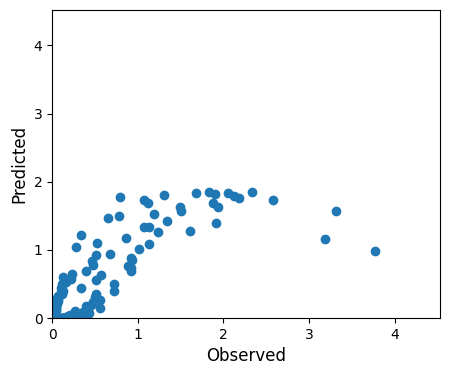

In [ ]:
plt.figure()
plt.scatter(outputs2, model.predict(inputs2), label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.xlim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.ylim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.show()

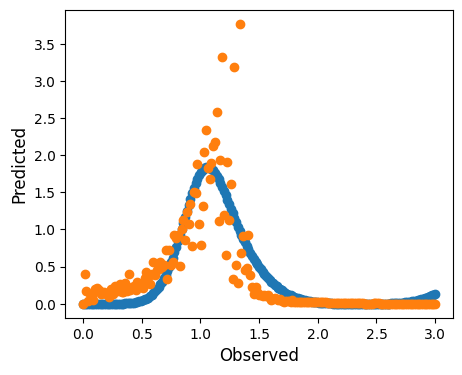

In [ ]:
plt.figure()
plt.scatter(inputs2, model.predict(inputs2), label='Training data')
plt.scatter(inputs2,outputs2, label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs2, model.predict(inputs2))
print(f'Best identified model (LaTeX): {model.latex()}')
print(f'R2 score: {r2}')

Best identified model (LaTeX): 27.2 \left(0.422 x_{0} - 1\right)^{4} \tanh^{2}{\left(x_{0}^{4} \right)}
R2 score: 0.6917293517075056


In [ ]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,2,0.431345,tanh(exp(-0.89751154)),0.000000,tanh(exp(-0.89751154)),PySRFunction(X=>tanh(exp(-0.89751154)))
1,3,0.431344,exp(-0.979662) / 0.97346866,0.000002,exp(-0.979662)/0.97346866,PySRFunction(X=>exp(-0.979662)/0.97346866)
2,4,0.374047,square(tanh(x0 + -2.5872076)),0.142524,tanh(x0 - 2.5872076)**2,PySRFunction(X=>tanh(x0 - 2.5872076)**2)
3,6,0.243978,0.89801854 - tanh(square(x0 + -1.0234737)),0.213652,0.89801854 - tanh(1.04749841459169*(0.97706467...,PySRFunction(X=>0.89801854 - tanh(1.0474984145...
4,8,0.172046,1.162954 - tanh(square((x0 + -1.0824636) / 0.4...,0.174658,1.162954 - tanh(5.97616822673387*(0.9238185930...,PySRFunction(X=>1.162954 - tanh(5.976168226733...
5,10,0.169005,square(square((x0 / 1.4237149) + -1.9498332) *...,0.008918,14.4540596801282*(0.360229693775605*x0 - 1)**4...,PySRFunction(X=>14.4540596801282*(0.3602296937...
6,11,0.132971,square(square((x0 / 1.0377171) + -2.2840528) *...,0.239797,27.2160163242912*(0.421905209122975*x0 - 1)**4...,PySRFunction(X=>27.2160163242912*(0.4219052091...


In [ ]:
model.equations_['equation'][6]

'square(square((x0 / 1.0377171) + -2.2840528) * tanh(square(square(x0))))'